# **Introduction**

- NAMA : Wawan Setiawan
- BATCH : HCK-006

## **Dataset**

The dataset is related to customer churn prediction, where the goal is to predict whether a customer is likely to churn based on the given features. Machine learning models can be trained on this dataset to predict the churn risk of customers, helping businesses take appropriate actions to retain customers and improve customer satisfaction.


## **Problem Statement**

Create a robust costumer churn prediction to directly intialize and handle the appropriate actions to prevent costumers leaving our services

# **Import Library**

In [451]:
! pip install feature_engine

In [452]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer

#model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential, Model, load_model
# from tensorflow.python.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

#evaluasi
from sklearn.metrics import mean_absolute_error

#save model
import joblib
import json

import warnings
warnings.filterwarnings("ignore")

np.random.seed(50)
tf.random.set_seed(50)

# **Data Loading**

In [453]:
# data loading
df = pd.read_csv('/content/churn.csv')
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [454]:
# head
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [455]:
# tail
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


# **EXPLORATORY DATA ANALYSIS (EDA)**

In [456]:
# check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [457]:
## check data duplicate
df[df.duplicated()].shape

(18, 22)

In [458]:
## check missing values
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [459]:
## data overview column categorical and numerical
num_col = df.describe().columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()

In [460]:
# numeric overview
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.0,37.120697,15.866834,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,37010.0,-41.943502,228.875324,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,37010.0,279.201356,330.017336,0.00,60.1225,161.770,356.5250,3235.578521
avg_transaction_value,37010.0,29272.430216,19445.963492,800.46,14177.8350,27554.485,40858.6725,99914.050000
avg_frequency_login_days,37010.0,14.659540,9.478756,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,37010.0,623.590885,270.218956,0.00,574.2200,680.400,756.9900,2069.069761
churn_risk_score,37010.0,0.540881,0.498333,0.00,0.0000,1.000,1.0000,1.000000


In [461]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

user_id

b749631fc10ff0da    2
9c8c2db425854d5e    2
9186d6f284e4ac5b    2
a121fe1247bf3d61    2
9f97903015fd0580    2
                   ..
a11563b8312bd92e    1
835a897bb342ae27    1
887c3b0d137541b8    1
9b6a1597dd513b25    1
93b5d0330d24fa15    1
Name: user_id, Length: 36992, dtype: int64
----------
gender

F    18497
M    18454
Name: gender, dtype: int64
----------
region_category

Town       14135
City       12744
Village     4700
Name: region_category, dtype: int64
----------
membership_category

Basic Membership       7727
No Membership          7693
Gold Membership        6799
Silver Membership      5991
Premium Membership     4458
Platinum Membership    4342
Name: membership_category, dtype: int64
----------
joining_date

2015-06-02    55
2015-07-04    51
2015-06-21    50
2015-06-26    49
2016-08-03    49
              ..
2015-06-07    19
2015-09-12    18
2016-06-03    18
2017-07-03    18
2015-03-04    16
Name: joining_date, Length: 1096, dtype: int64
----------
joined_throug

<Axes: xlabel='churn_risk_score', ylabel='count'>

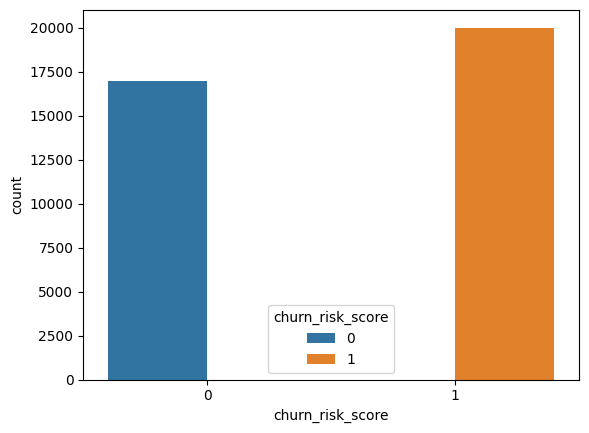

In [462]:
# independent distribution
sns.countplot(data=df, x='churn_risk_score', hue='churn_risk_score')

In [463]:
df['churn_risk_score'].value_counts()

1    20018
0    16992
Name: churn_risk_score, dtype: int64

The dataset has an imbalance in the independent variable "churn_risk_score," which is the target variable indicating the churn risk of customers. It contains two unique values: 0 and 1. Upon examining the dataset, we observe that there are 20,018 instances of class 1 (indicating churn) and 16,992 instances of class 0 (indicating not churn).

This imbalance presents a challenge for predictive modeling because the model may tend to favor the majority class (class 0) due to its higher representation in the dataset. As a result, the predictive accuracy of the model may be high for the majority class but poor for the minority class (class 1). This imbalance can lead to biased predictions, where the model may struggle to correctly identify instances of churn.

<Axes: xlabel='region_category', ylabel='count'>

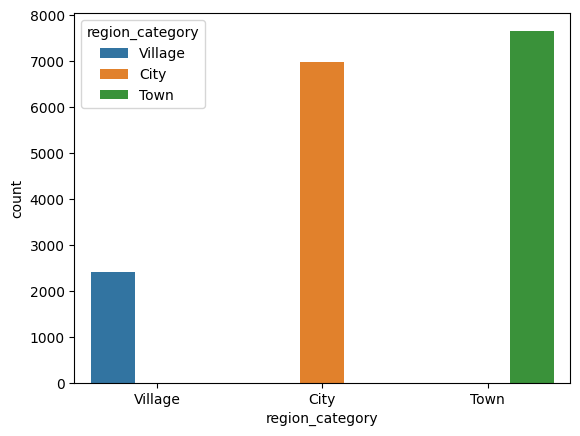

In [464]:
# Analysis churn_risk_score count by region_category
sns.countplot(data=df[df['churn_risk_score'] == 1], x='region_category', hue='region_category')

majority user are lived in city and town

<function matplotlib.pyplot.show(close=None, block=None)>

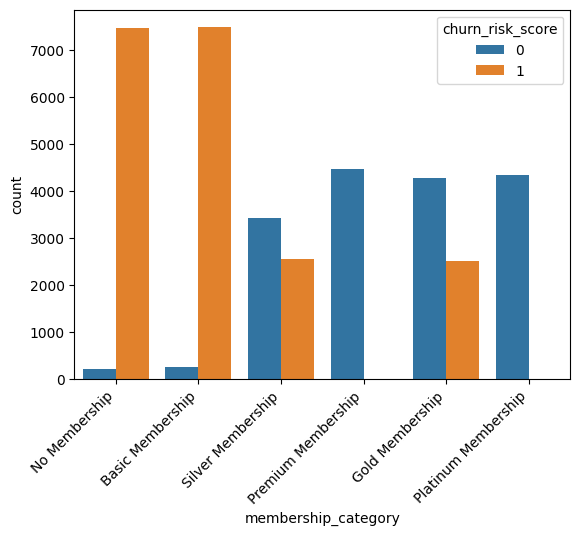

In [465]:
# Analysis churn_risk_score count by membership status
sns.countplot(data=df, x='membership_category', hue='churn_risk_score')
plt.xticks(rotation=45, ha='right')
plt.show

The data reveals that the highest churn rate is observed among customers who have either 'No Membership' or a 'Basic Membership.' This finding raises interesting questions about the factors driving churn for customers in these membership categories. We need to investigate whether these customers face specific challenges or have unmet needs that might lead them to consider discontinuing their association with our services.

In this case, our focus is to predict customer churn. Let's explore the Customer Preferences and Engagement Metrics to identify patterns, relationships, and potential indicators of churn risk among customers.

- **Customer Behavior and Preferences:**
Features like 'preferred_offer_types', 'medium_of_operation', and 'internet_option' will reveal customer preferences and usage patterns. We'll assess if specific offer types, medium of operation, or internet options correlate with churn risk.

- **Activity and Engagement Metrics:**
Metrics like 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', and 'avg_frequency_login_days' can indicate customer engagement. We'll explore how these factors relate to churn likelihood.



### Customer Behavior and Preferences
 Features like 'preferred_offer_types', 'medium_of_operation', and 'internet_option' will reveal customer preferences and usage patterns. We'll assess if specific offer types, medium of operation, or internet options correlate with churn risk

<function matplotlib.pyplot.show(close=None, block=None)>

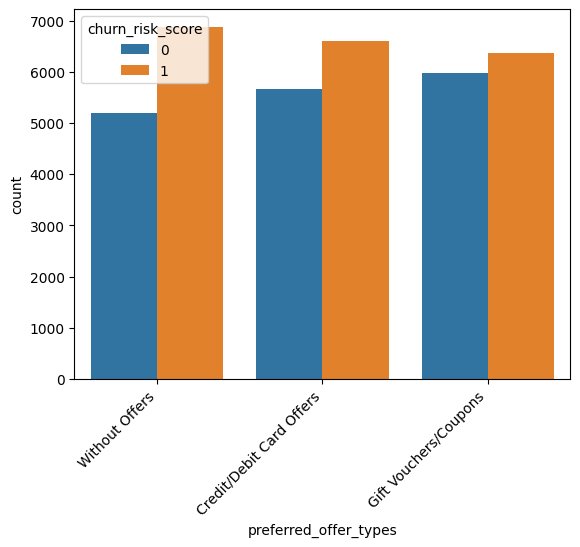

In [466]:
# Analysis churn_risk_score count by preferred_offer_types
sns.countplot(data=df, x='preferred_offer_types', hue='churn_risk_score')
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

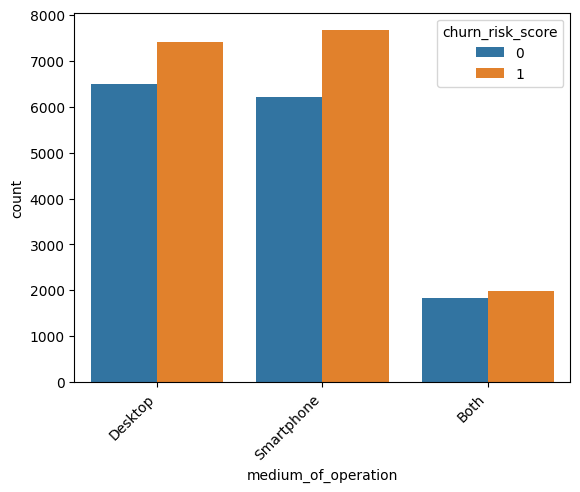

In [467]:
# Analysis churn_risk_score count by medium_of_operation
sns.countplot(data=df, x='medium_of_operation', hue='churn_risk_score')
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

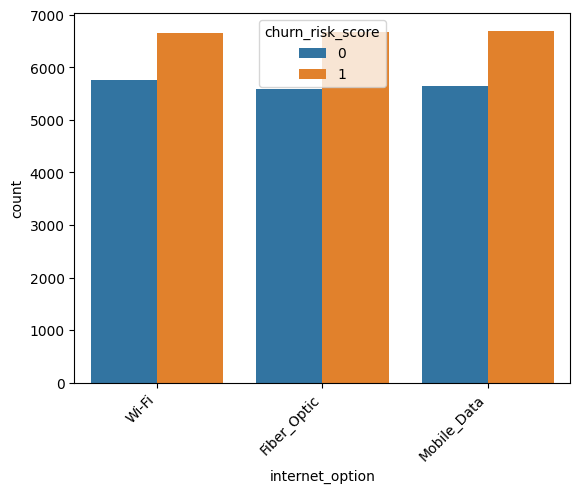

In [468]:
# Analysis churn_risk_score count by internet_option
sns.countplot(data=df, x='internet_option', hue='churn_risk_score')
plt.xticks(rotation=45, ha='right')
plt.show

- Costumer are more likely to churn if choose option `without offer`
- Medium of operation using smartphone is more likely to churn but not significanly different with dekstop user
- it seems that is no indication between internet option

### **Activity and Engagement Metrics**
 Metrics like 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', and 'avg_frequency_login_days' can indicate customer engagement. We'll explore how these factors relate to churn likelihood.

### Customer Loyalty and Complaints
'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', and 'complaint_status' may provide insights into customer loyalty and satisfaction. We'll analyze if these factors play a role in churn prediction.



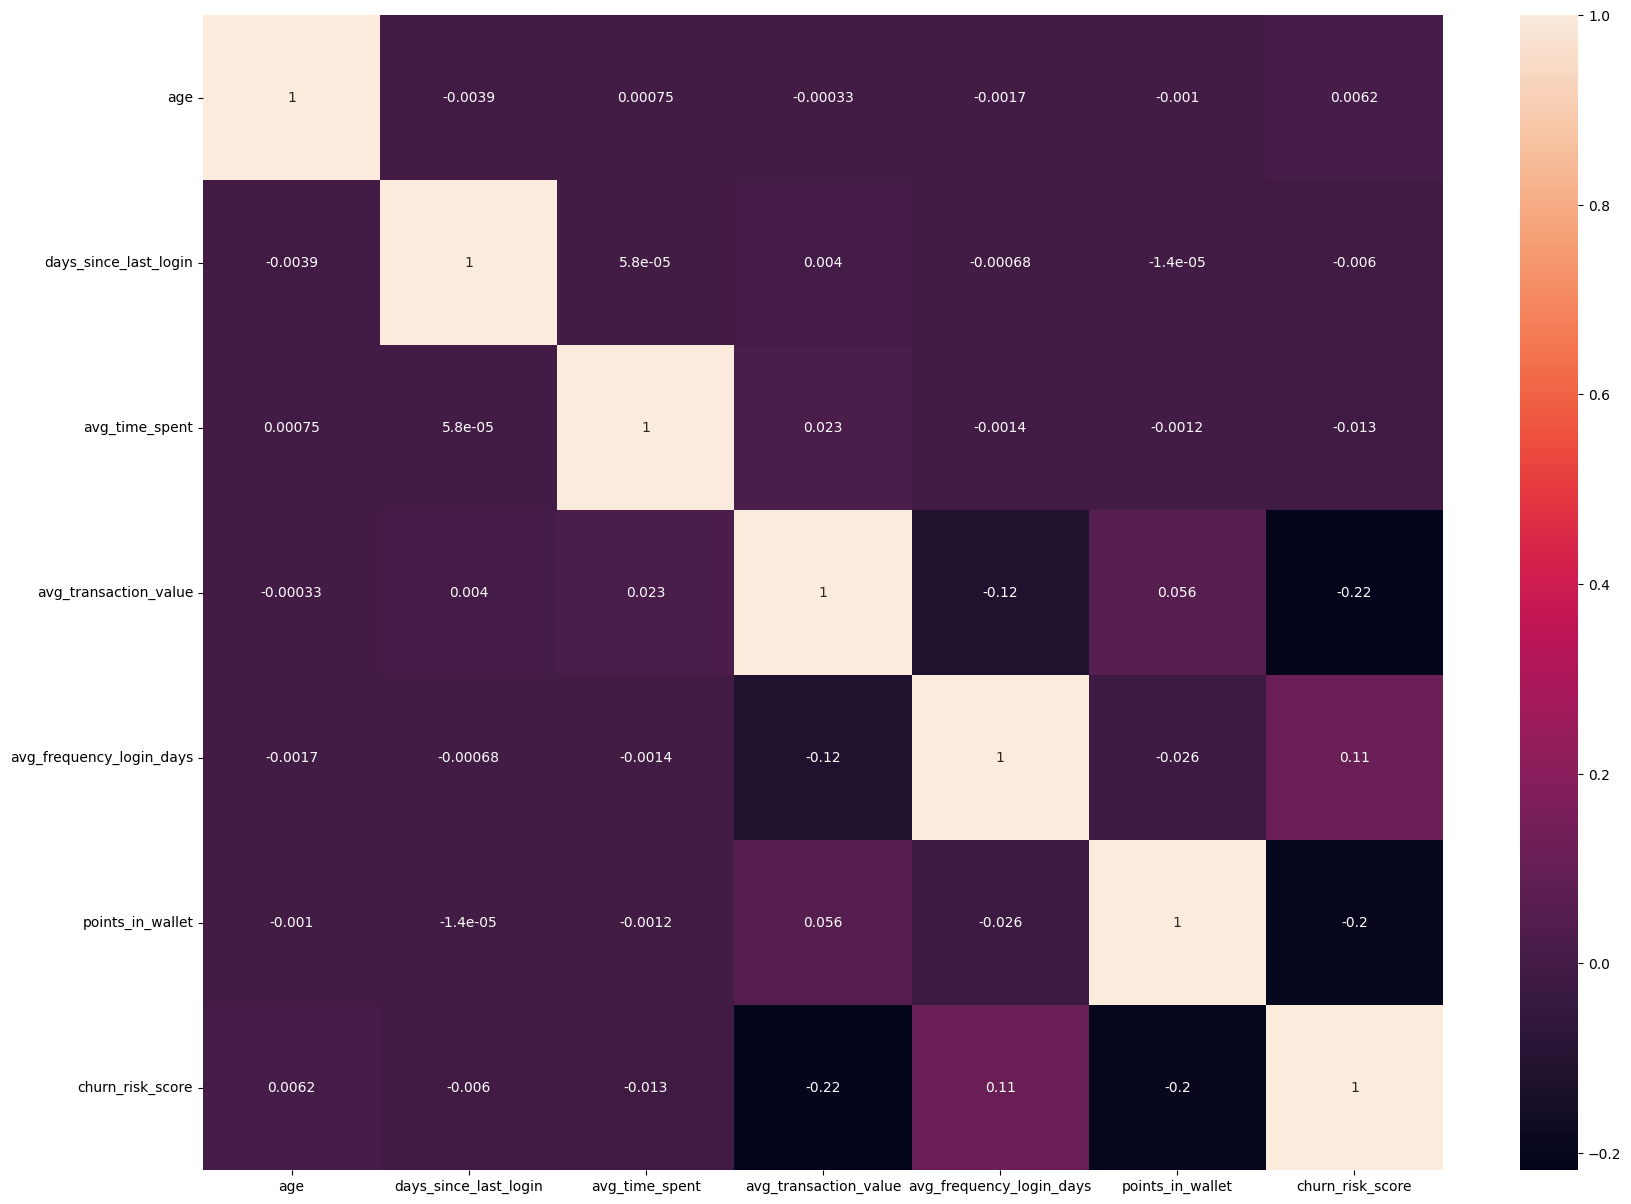

In [469]:
# Numeric Correlation
fig,ax = plt.subplots(figsize=[20,15])
corr = df.corr()
ax = sns.heatmap(corr,annot=True)
plt.show()

'avg_transaction_value', 'avg_frequency_login_days' and 'points_in_wallet` = indicate more on costumer who likely to churn.

<function matplotlib.pyplot.show(close=None, block=None)>

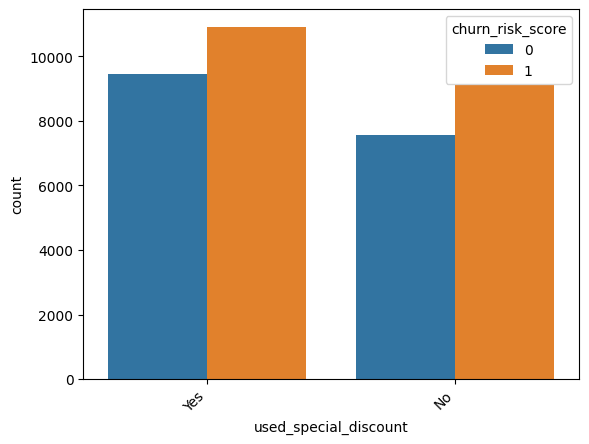

In [470]:
# Analysis churn_risk_score count by used_special_discount
sns.countplot(data=df, x='used_special_discount', hue='churn_risk_score')
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

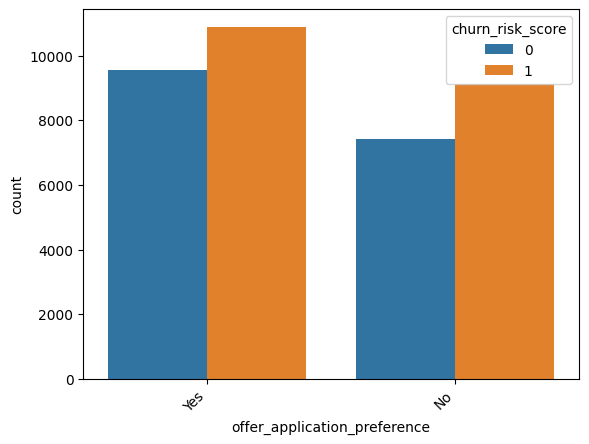

In [471]:
# Analysis churn_risk_score count by offer_application_preference
sns.countplot(data=df, x='offer_application_preference', hue='churn_risk_score')
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

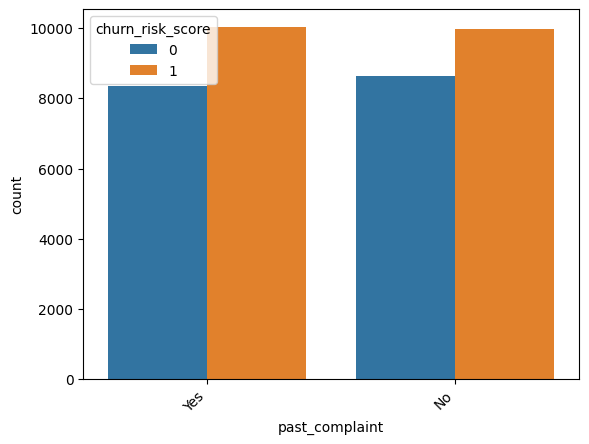

In [472]:
# Analysis churn_risk_score count by past_complaint
sns.countplot(data=df, x='past_complaint', hue='churn_risk_score')
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

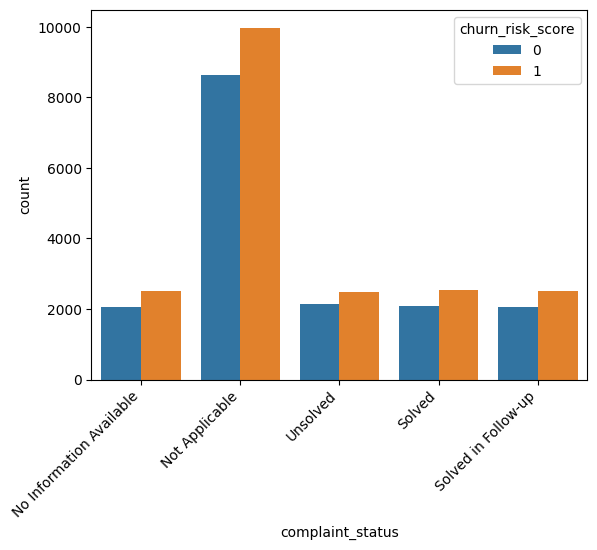

In [473]:
# Analysis churn_risk_score count by complaint_status
sns.countplot(data=df, x='complaint_status', hue='churn_risk_score')
plt.xticks(rotation=45, ha='right')
plt.show

most of churn costumer didn't leave a complaint

### EDA Conslusion

- The dataset has an imbalance in the independent variable "churn_risk_score," which is the target variable indicating the churn risk of customers. It contains two unique values: 0 and 1. Upon examining the dataset, we observe that there are 20,018 instances of class 1 (indicating churn) and 16,992 instances of class 0 (indicating not churn).

- majority user are lived in city and town

- data reveals that the highest churn rate is observed among customers who have either 'No Membership' or a 'Basic Membership.'

- accross costumer activity and loyalty : `avg_transaction_value`, `avg_frequency_login_days` and `points_in_wallet`  indicate more on costumer who likely to churn

- most of churn costumer didn't leave a complaint



# **Feature Engineering**

## Data Cleaning

In [474]:
df_clean = df.copy()
df_clean.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [475]:
# shape of dataframe before remove duplicates
df_clean[df_clean.duplicated()].shape

(18, 22)

there are 18 row is duplicate

In [476]:
# Remove duplicate
df_clean.drop_duplicates(inplace=True)

# shape of dataframe after remove duplicates
df_clean[df_clean.duplicated()].shape

(0, 22)

In [477]:
# Check Missing Value
df_clean.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [478]:
# Check Missing Values for Variable `gender`

df_clean[df_clean.gender.isnull()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
22,be55c26b06eeb561,54,NaN,City,Basic Membership,2017-03-18,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,156.07000,32463.61,16.000000,639.820000,Yes,No,Yes,No Information Available,Poor Product Quality,1
145,a159641a5f8deac9,47,NaN,Town,Silver Membership,2015-04-20,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,262.65000,35934.73,19.000000,784.300000,Yes,Yes,Yes,Solved,Poor Website,0
728,b85b3149c460cd02,40,NaN,City,Silver Membership,2017-01-01,No,Without Offers,Desktop,Mobile_Data,...,333.25000,21440.09,18.000000,749.310000,Yes,No,No,Not Applicable,Products always in Stock,0
2304,94070fc001e5d60b,23,NaN,Village,Premium Membership,2017-10-28,Yes,Gift Vouchers/Coupons,NaN,Wi-Fi,...,93.88000,38875.53,22.000000,1181.889841,Yes,No,Yes,Unsolved,Poor Website,0
2586,8f54a6a4f89f7305,41,NaN,City,No Membership,2016-11-05,Yes,Without Offers,NaN,Fiber_Optic,...,52.11000,28298.29,6.000000,548.630000,No,Yes,Yes,Unsolved,Poor Product Quality,1
3926,8ace27a9d93861b0,13,NaN,Town,No Membership,2016-09-18,NaN,Credit/Debit Card Offers,Smartphone,Fiber_Optic,...,549.90000,15737.81,9.000000,573.000000,No,Yes,Yes,Unsolved,Too many ads,1
4023,9518edceea074d43,26,NaN,City,Basic Membership,2017-05-07,NaN,Without Offers,Smartphone,Wi-Fi,...,259.82000,21380.00,0.000000,0.000000,No,Yes,No,Not Applicable,Poor Website,1
4328,8c8af015fb0c05cd,52,NaN,Town,Gold Membership,2017-08-03,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,...,128.28000,15277.33,28.000000,787.840000,Yes,No,Yes,Solved,Poor Customer Service,0
5912,8d67e181f8dac02a,53,NaN,Village,Basic Membership,2015-09-13,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,...,650.07000,26235.35,0.000000,532.600000,No,Yes,Yes,No Information Available,No reason specified,1
5979,b0eff1eecbf9eb56,18,NaN,NaN,Platinum Membership,2015-12-15,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,221.57000,12808.70,7.000000,0.000000,Yes,No,Yes,Solved in Follow-up,No reason specified,0


In [479]:
# Check Missing Values for Variable `region_category`

df_clean[df_clean.region_category.isnull()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.480000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.970000,Yes,No,Yes,No Information Available,Poor Customer Service,1
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.30,13160.39,24.0,712.940000,Yes,No,No,Not Applicable,No reason specified,1
10,a23f0c8e2f275bc5,53,F,NaN,Basic Membership,2015-09-02,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,...,39.85,24087.96,10.0,656.380000,Yes,No,No,Not Applicable,No reason specified,1
13,8a2770c75d7ca0f3,33,M,NaN,No Membership,2016-01-25,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,...,142.85,9854.95,15.0,1357.366572,No,Yes,No,Not Applicable,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36984,9814f1d3a7bc587c,12,F,NaN,Basic Membership,2017-02-17,Yes,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,41.10,37677.31,9.0,561.200000,Yes,No,No,Not Applicable,No reason specified,1
36988,9afb485363a32b12,45,F,NaN,Gold Membership,2016-02-20,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,...,30.79,43048.44,12.0,689.440000,No,Yes,No,Not Applicable,Poor Website,1
36991,a6f0555c497dad8c,50,M,NaN,Silver Membership,2017-03-11,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,...,31.39,41364.87,10.0,744.750000,Yes,No,Yes,No Information Available,Too many ads,0
36996,87b2cfb9c6df3e13,63,F,NaN,Gold Membership,2015-09-10,Yes,Without Offers,Smartphone,Mobile_Data,...,105.90,21985.81,27.0,603.350000,No,Yes,Yes,Solved,Too many ads,1


In [480]:
# Check Missing Values for Variable `joined_through_referral`

df_clean[df_clean.joined_through_referral.isnull()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
12,8578cd74b0eb2c83,24,F,Village,Silver Membership,2016-04-05,NaN,Without Offers,Smartphone,Mobile_Data,...,160.270000,49607.97,20.0,0.00,No,Yes,Yes,Solved,Too many ads,1
16,b1807a7cb1c66671,63,M,NaN,Silver Membership,2015-06-13,NaN,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,92.070000,21395.38,26.0,667.71,No,Yes,No,Not Applicable,Too many ads,1
19,a19f84a19e38e20c,40,M,City,No Membership,2015-05-05,NaN,Without Offers,Desktop,Wi-Fi,...,119.120000,4384.76,8.0,0.00,Yes,No,Yes,Solved,Too many ads,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36998,bbb3a45b217bd6d9,18,F,Town,Premium Membership,2016-05-29,NaN,Without Offers,Smartphone,Mobile_Data,...,401.110000,61048.95,9.0,787.61,Yes,Yes,No,Not Applicable,User Friendly Website,0
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.83,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.01,Yes,No,No,Not Applicable,Poor Customer Service,1
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0


In [481]:
# Check Missing Values for Variable `preferred_offer_types`

df_clean[df_clean.preferred_offer_types.isnull()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
90,83f7dd56ba3a0464,52,F,NaN,Basic Membership,2017-04-20,Yes,NaN,Smartphone,Wi-Fi,...,68.820000,28467.12,0.00000,0.000000,Yes,No,No,Not Applicable,Poor Customer Service,1
164,8770519c75c4b2d3,58,M,City,Silver Membership,2017-07-07,No,NaN,NaN,Mobile_Data,...,173.870000,1045.85,24.00000,638.630000,No,Yes,No,Not Applicable,Too many ads,1
171,b42a19688ed2c20b,47,F,Town,No Membership,2017-07-20,No,NaN,Smartphone,Fiber_Optic,...,1033.552633,45197.88,7.00000,626.870000,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
246,88c4c93b81513e57,63,M,City,Gold Membership,2017-08-19,Yes,NaN,Smartphone,Fiber_Optic,...,438.260000,21627.21,13.00000,784.750000,Yes,No,Yes,No Information Available,Poor Website,0
254,a0ce1bae55f27bae,10,M,Town,Gold Membership,2016-07-22,Yes,NaN,Desktop,Fiber_Optic,...,869.982709,29733.41,6.00000,1216.180871,Yes,No,No,Not Applicable,Poor Website,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36232,887a1d3f3ad3ff15,63,M,NaN,Basic Membership,2016-08-25,NaN,NaN,Smartphone,Wi-Fi,...,30.260000,26346.31,24.00000,1145.229831,No,Yes,No,Not Applicable,Poor Customer Service,1
36268,83f27ce3e567032f,56,M,Town,Gold Membership,2017-08-28,Yes,NaN,Smartphone,Mobile_Data,...,99.540000,47845.03,38.34557,703.770000,Yes,No,Yes,Unsolved,No reason specified,0
36545,9825def06831b1c1,16,F,Village,Basic Membership,2017-07-27,Yes,NaN,Smartphone,Mobile_Data,...,94.860000,32054.85,15.00000,698.610000,No,Yes,No,Not Applicable,Poor Customer Service,1
36565,851bb0bed651ee79,57,M,NaN,Basic Membership,2017-11-27,No,NaN,NaN,Wi-Fi,...,42.320000,5430.74,28.00000,827.597493,Yes,No,No,Not Applicable,Poor Customer Service,1


In [482]:
# Check Missing Values for Variable `medium_of_operation`

df_clean[df_clean.medium_of_operation.isnull()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49,No,Yes,Yes,Unsolved,Poor Product Quality,0
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00,Yes,Yes,No,Not Applicable,Products always in Stock,0
10,a23f0c8e2f275bc5,53,F,NaN,Basic Membership,2015-09-02,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,...,39.850000,24087.96,10.0,656.38,Yes,No,No,Not Applicable,No reason specified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36981,9910a08d19c267cb,60,F,NaN,Platinum Membership,2015-05-24,Yes,Without Offers,NaN,Mobile_Data,...,147.610000,6947.31,15.0,814.68,No,Yes,No,Not Applicable,Reasonable Price,0
36995,aef81486b7cc8c73,51,M,Village,Silver Membership,2015-06-18,No,Credit/Debit Card Offers,NaN,Fiber_Optic,...,254.670000,12748.24,18.0,0.00,Yes,No,Yes,Unsolved,Too many ads,0
36999,bb5eb87592709200,52,M,Town,Gold Membership,2017-03-30,Yes,Credit/Debit Card Offers,NaN,Fiber_Optic,...,831.490000,37021.18,25.0,751.48,No,Yes,Yes,No Information Available,Poor Website,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0


Missing Completely At Random, which is a missing data mechanism where the probability of a data point being missing is unrelated to both observed and unobserved data.

In [484]:
# Count How Many Observations that We Would Drop

df_clean_drop_mv = df_clean.copy()
print('Data before drop : ', df_clean_drop_mv.shape[0])
print('Data after drop : ', df_clean_drop_mv.dropna().shape[0])
print('Percentage of data without missing values (%) : ', df_clean_drop_mv.dropna().shape[0] / np.float(df_clean_drop_mv.shape[0]) * 100)

Data before drop :  36992
Data after drop :  22853
Percentage of data without missing values (%) :  61.778222318339104


missing value is almost 38% of data, in this case since it is catergorical and have no significant influence on y target, next step will drop the entire column to save a realiable data

In [485]:
# delete row missing value on y target
columns_with_missing_values = ['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']
df_clean = df_clean.drop(columns_with_missing_values, axis=1)
df_clean

,user_id,age,membership_category,joining_date,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,No Membership,2017-04-05,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,Basic Membership,2017-03-31,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,Silver Membership,2017-02-11,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,No Membership,2015-12-23,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,Silver Membership,2015-03-20,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,Gold Membership,2015-03-05,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,Gold Membership,2017-01-15,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,Gold Membership,2015-07-11,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,Gold Membership,2016-05-25,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [486]:
# Check Missing Value
df_clean.isnull().sum()

user_id                         0
age                             0
membership_category             0
joining_date                    0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

## Split Data Train

In [487]:
#split Feature, Target alse split Train, Validation and Test
X= df_clean.drop(['user_id','joining_date', 'last_visit_time', 'churn_risk_score'], axis=1)
y= df_clean.churn_risk_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.8, stratify=y_train)

In [488]:
# shape information
for i in [X_train, X_test, X_val, y_train, y_test, y_val]:
    print(i.shape)

(23674, 13)
(7399, 13)
(5919, 13)
(23674,)
(7399,)
(5919,)


In [489]:
## data overview column categorical and numerical
num_col = X_train.describe().columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

In [490]:
num_col

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

In [491]:
cat_col

['membership_category',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

## EDA FOR MODELING

In [492]:
X_train_eda = X_train.copy()

In [493]:
X_train_eda.head()

,age,membership_category,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
648,25,Silver Membership,Mobile_Data,13,263.390000,39342.86,0.0,629.49,Yes,No,No,Not Applicable,Too many ads
13318,16,Platinum Membership,Fiber_Optic,17,179.240000,38249.64,28.0,778.61,Yes,No,Yes,Unsolved,Poor Customer Service
14189,58,Basic Membership,Fiber_Optic,-999,1603.585823,18718.09,16.0,635.51,No,Yes,Yes,Solved,No reason specified
23463,52,Basic Membership,Wi-Fi,11,108.170000,8272.55,7.0,557.27,Yes,No,No,Not Applicable,Poor Product Quality
8385,50,Silver Membership,Wi-Fi,11,33.640000,12297.07,13.0,653.90,No,Yes,No,Not Applicable,Poor Customer Service


### Handling Outliers

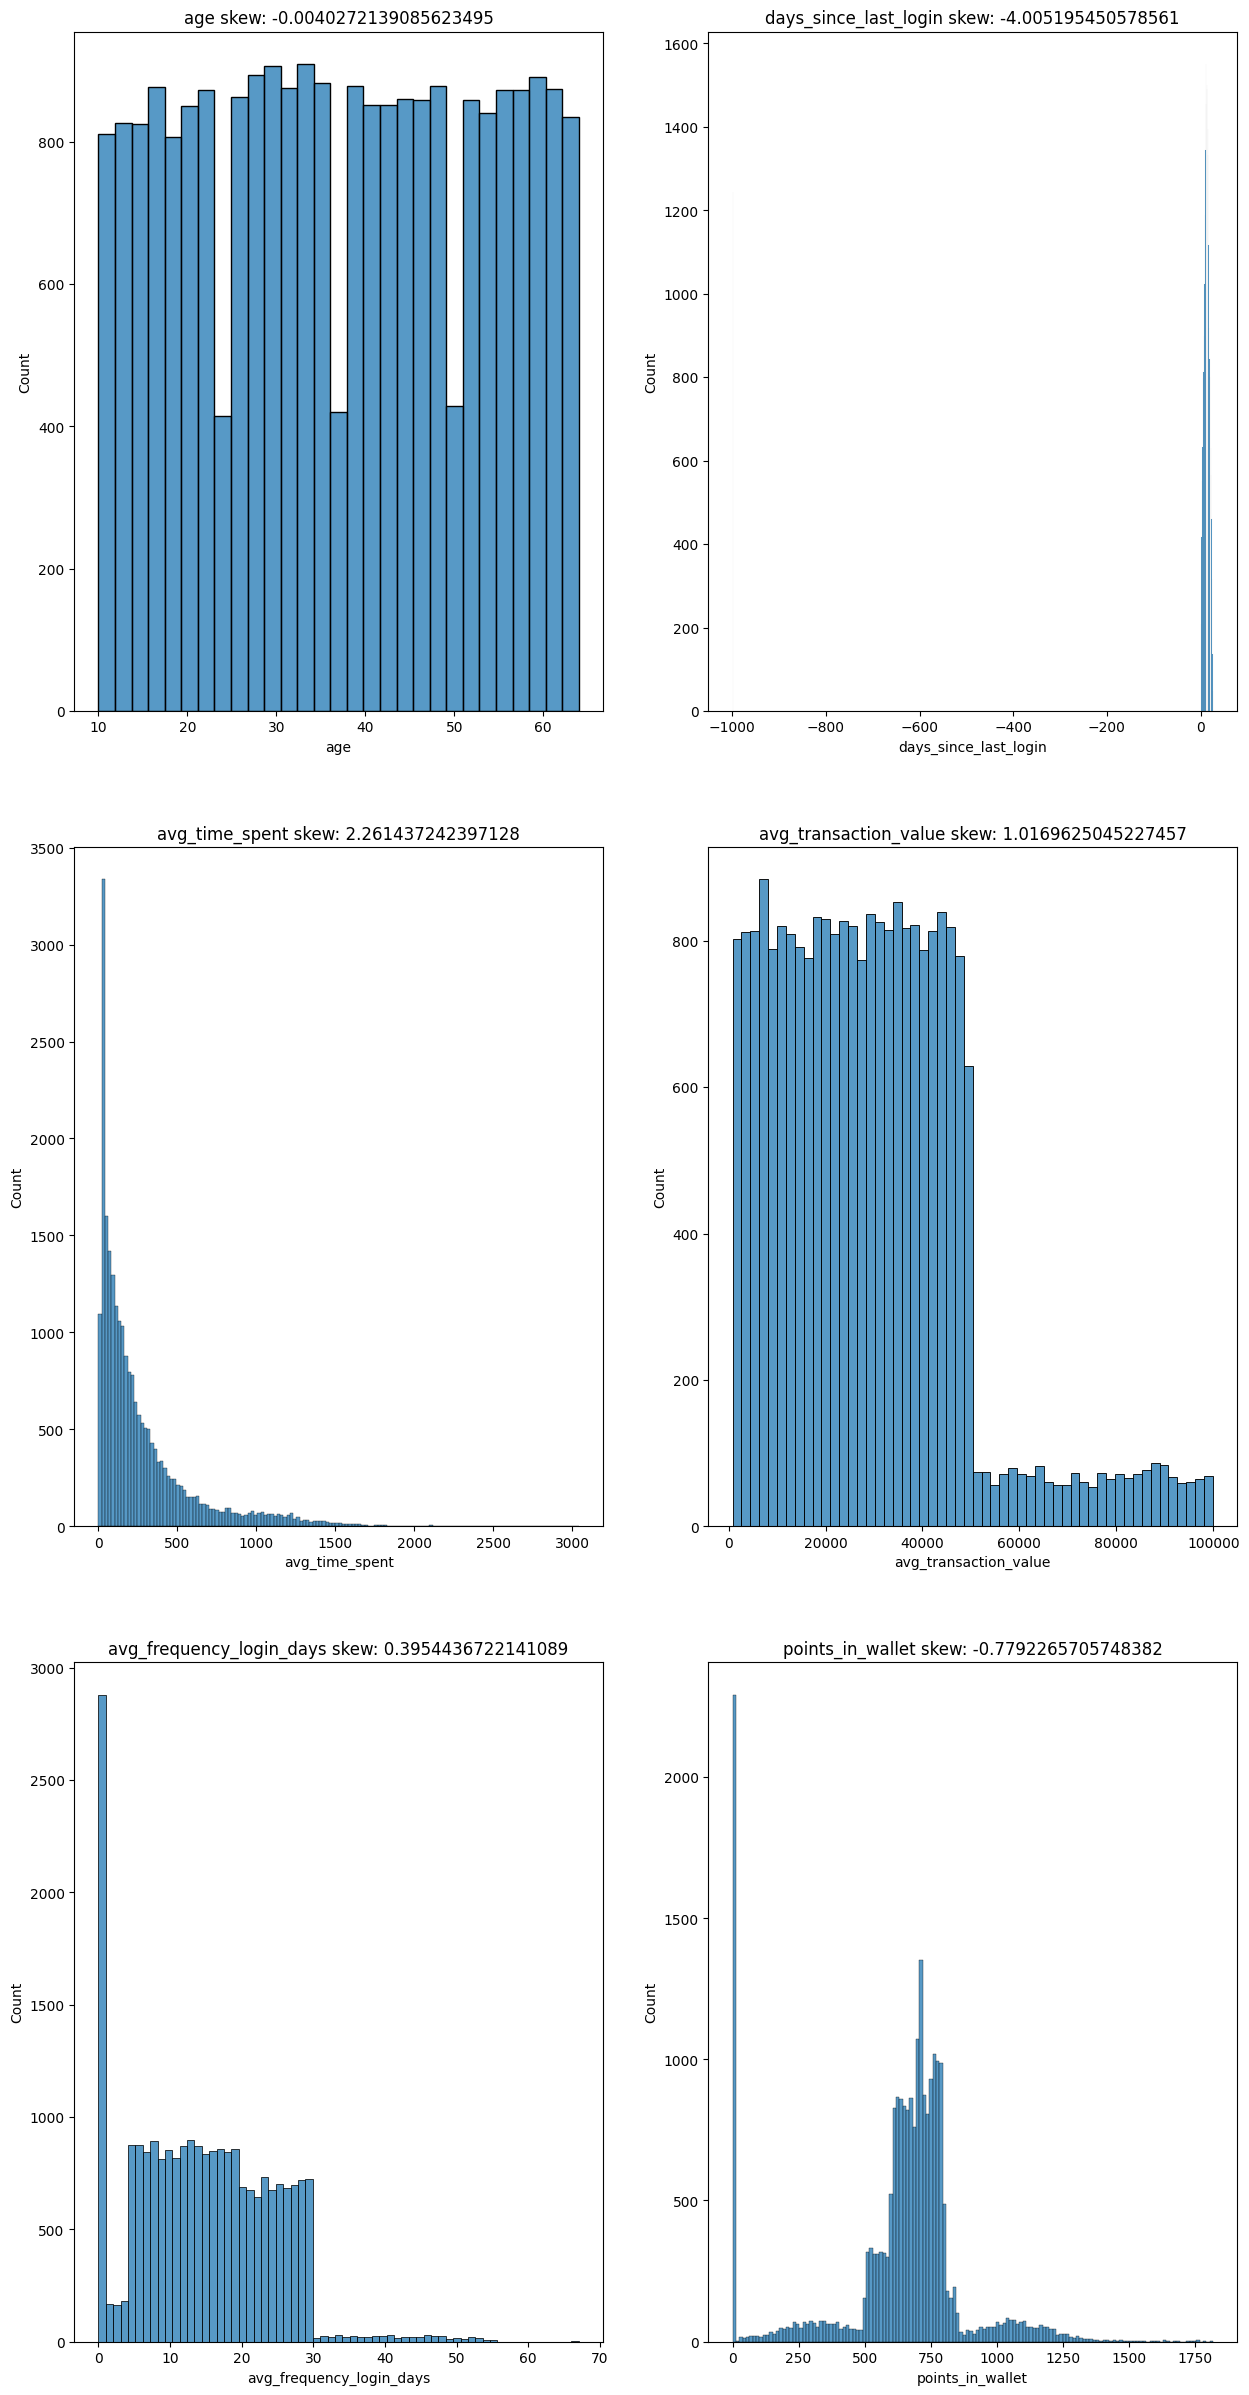

In [494]:
# ploting numerical columns to find skewness
fig, ax = plt.subplots(nrows=3,ncols=2, figsize=[15,30])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.histplot(X_train_eda[col], ax=ax[idx])
    ax[idx].set_title(f'{num_col[idx]} skew: {X_train_eda[col].skew()}')

In [495]:
# define function for printing skewness
def print_skew(data,columns):
  for col in columns:
    if -0.5 <= data[col].skew() <= 0.5:
      print(f'Column {col} :{data[col].skew()} is normal distribution')
    elif data[col].skew() > 0.5:
      print(f'Column {col} :{data[col].skew()} right skewed')
    elif data[col].skew() < -0.5:
      print(f'Column {col} :{data[col].skew()} left skewed')

In [496]:
print_skew(X_train_eda,num_col)

Column age :-0.0040272139085623495 is normal distribution
Column days_since_last_login :-4.005195450578561 left skewed
Column avg_time_spent :2.261437242397128 right skewed
Column avg_transaction_value :1.0169625045227457 right skewed
Column avg_frequency_login_days :0.3954436722141089 is normal distribution
Column points_in_wallet :-0.7792265705748382 left skewed


In [497]:
# define function for iqr and gaussian
iqr_feature_1 = []
iqr_feature_2 = []
gaussian_feature = []
def iqr_or_gaussian(data,columns):
  for col in columns:
    if -0.5 <= data[col].skew() <= 0.5:
      gaussian_feature.append(col)
    elif data[col].skew() > 0.5 and data[col].skew() <= 3 :
      iqr_feature_2.append(col)
    elif data[col].skew() > 3 :
      iqr_feature_1.append(col)
    elif data[col].skew() < -0.5 and data[col].skew() <= -3 :
      iqr_feature_2.append(col)
    elif data[col].skew() > -3 :
      iqr_feature_1.append(col)

In [498]:
iqr_or_gaussian(X_train_eda,num_col)

In [499]:
iqr_feature_1

['points_in_wallet']

In [500]:
iqr_feature_2

['days_since_last_login', 'avg_time_spent', 'avg_transaction_value']

In [501]:
gaussian_feature

['age', 'avg_frequency_login_days']

In [502]:
# define function for print percentage outliers1
def percent_features1(data,columns):
  for col in columns:
    upper = data[col].mean() + (1.5 * data[col].std())
    lower = data[col].mean() - (1.5 * data[col].std())
    outlier = data[(X_train_eda[col] <= lower) | (X_train_eda[col] >= upper)]
    print('percentage', X_train_eda[col].name, ':', len(outlier)/data.shape[0] * 100, '%')

In [503]:
# define function for print percentage outliers2
def percent_features2(data,columns):
  for col in columns:
    upper = data[col].mean() + (3 * data[col].std())
    lower = data[col].mean() - (3 * data[col].std())
    outlier = data[(X_train_eda[col] <= lower) | (X_train_eda[col] >= upper)]
    print('percentage', X_train_eda[col].name, ':', len(outlier)/data.shape[0] * 100, '%')

In [504]:
# define function for print percentage outliers3
def gaussian_features(data,columns):
  for col in columns:
    upper = data[col].mean() + (3 * data[col].std())
    lower = data[col].mean() - (3 * data[col].std())
    outlier = data[(data[col] <= lower) | (data[col] >= upper)]
    print('percentage', X_train_eda[col].name, ':', len(outlier)/data.shape[0] * 100, '%')

In [505]:
percent_features1(X_train_eda, iqr_feature_1)

percentage points_in_wallet : 16.541353383458645 %


In [506]:
percent_features2(X_train_eda, iqr_feature_2)

percentage days_since_last_login : 5.258933851482639 %
percentage avg_time_spent : 2.183830362422911 %
percentage avg_transaction_value : 1.9346118104249386 %


In [507]:
gaussian_features(X_train_eda, gaussian_feature)

percentage age : 0.0 %
percentage avg_frequency_login_days : 0.8828250401284109 %


### Trimming Outliers

In [508]:
# Trimming outliers using IQR method with threshold = 3
wins_1 = Winsorizer(capping_method='iqr', tail='both', fold=3, variables= iqr_feature_1, missing_values='ignore')

X_train_eda = wins_1.fit_transform(X_train_eda)
X_train_eda.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000
mean,37.141632,-40.458309,278.629369,29251.873712,14.633094,625.933390
std,15.771381,225.904975,328.798017,19488.233414,9.488158,260.988829
min,10.000000,-999.000000,0.000000,806.710000,0.000000,30.107500
25%,24.000000,8.000000,60.087500,14148.517500,7.000000,575.500000
50%,37.000000,12.000000,161.135000,27469.020000,14.000000,679.905000
75%,51.000000,16.000000,356.305000,40815.342500,22.000000,757.297500
max,64.000000,26.000000,3040.410000,99914.050000,67.062422,1302.690000


In [509]:
# Trimming outliers using IQR method with threshold = 1.5
wins_2 = Winsorizer(capping_method='iqr', tail='both', fold=1.5,
                  variables=iqr_feature_2, missing_values='ignore')

X_train_eda = wins_2.fit_transform(X_train_eda)
X_train_eda.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000
mean,37.141632,11.868083,248.884307,28964.059426,14.633094,625.933390
std,15.771381,6.599709,240.238343,18613.144601,9.488158,260.988829
min,10.000000,-4.000000,0.000000,806.710000,0.000000,30.107500
25%,24.000000,8.000000,60.087500,14148.517500,7.000000,575.500000
50%,37.000000,12.000000,161.135000,27469.020000,14.000000,679.905000
75%,51.000000,16.000000,356.305000,40815.342500,22.000000,757.297500
max,64.000000,26.000000,800.631250,80815.580000,67.062422,1302.690000


In [510]:
# Trimming outliers using Gaussian method with threshold = 3
wins_3 = Winsorizer(capping_method='gaussian', tail='both', fold=3,
                  variables=gaussian_feature, missing_values='ignore')

X_train_eda = wins_3.fit_transform(X_train_eda)
X_train_eda.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000
mean,37.141632,11.868083,248.884307,28964.059426,14.587551,625.933390
std,15.771381,6.599709,240.238343,18613.144601,9.332048,260.988829
min,10.000000,-4.000000,0.000000,806.710000,0.000000,30.107500
25%,24.000000,8.000000,60.087500,14148.517500,7.000000,575.500000
50%,37.000000,12.000000,161.135000,27469.020000,14.000000,679.905000
75%,51.000000,16.000000,356.305000,40815.342500,22.000000,757.297500
max,64.000000,26.000000,800.631250,80815.580000,43.096966,1302.690000


### Handling Missing Value

In [511]:
X_train_eda.isnull().sum()

age                             0
membership_category             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

There is no missing values

### Numerical Scaling

In [512]:
# Scaling numerical for standarize the scale of values
scaler = RobustScaler()

X_train_eda[num_col] = scaler.fit_transform(X_train_eda[num_col])
X_train_eda

,age,membership_category,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
648,-0.444444,Silver Membership,Mobile_Data,0.125,0.345202,0.445266,-0.933333,-0.277314,Yes,No,No,Not Applicable,Too many ads
13318,-0.777778,Platinum Membership,Fiber_Optic,0.625,0.061121,0.404271,0.933333,0.542939,Yes,No,Yes,Unsolved,Poor Customer Service
14189,0.777778,Basic Membership,Fiber_Optic,-2.000,2.158874,-0.328158,0.133333,-0.244200,No,Yes,Yes,Solved,No reason specified
23463,0.555556,Basic Membership,Wi-Fi,-0.125,-0.178804,-0.719863,-0.466667,-0.674569,Yes,No,No,Not Applicable,Poor Product Quality
8385,0.481481,Silver Membership,Wi-Fi,-0.125,-0.430410,-0.568945,-0.066667,-0.143044,No,Yes,No,Not Applicable,Poor Customer Service
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17184,0.962963,Platinum Membership,Mobile_Data,0.875,1.060555,-0.319282,-0.266667,3.264266,Yes,No,No,Not Applicable,Products always in Stock
9439,-0.444444,Premium Membership,Wi-Fi,0.375,-0.391587,-0.322414,0.533333,0.204211,Yes,No,No,Not Applicable,No reason specified
10006,0.148148,Silver Membership,Mobile_Data,-2.000,-0.064193,0.018227,0.266667,0.546405,No,Yes,Yes,Solved,Poor Customer Service
4683,-0.074074,Premium Membership,Fiber_Optic,-0.750,0.331361,-0.717394,0.666667,0.507845,Yes,No,Yes,No Information Available,Too many ads


### Encoding Catergorical

In [513]:
X_train_eda[cat_col]

,membership_category,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
648,Silver Membership,Mobile_Data,Yes,No,No,Not Applicable,Too many ads
13318,Platinum Membership,Fiber_Optic,Yes,No,Yes,Unsolved,Poor Customer Service
14189,Basic Membership,Fiber_Optic,No,Yes,Yes,Solved,No reason specified
23463,Basic Membership,Wi-Fi,Yes,No,No,Not Applicable,Poor Product Quality
8385,Silver Membership,Wi-Fi,No,Yes,No,Not Applicable,Poor Customer Service
...,...,...,...,...,...,...,...
17184,Platinum Membership,Mobile_Data,Yes,No,No,Not Applicable,Products always in Stock
9439,Premium Membership,Wi-Fi,Yes,No,No,Not Applicable,No reason specified
10006,Silver Membership,Mobile_Data,No,Yes,Yes,Solved,Poor Customer Service
4683,Premium Membership,Fiber_Optic,Yes,No,Yes,No Information Available,Too many ads


In [514]:
# encoding Ordinal
member_cat = ['No Membership', 'Basic Membership','Silver Membership', 'Gold Membership', 'Premium Membership', 'Platinum Membership']
disc_cat = ['No', 'Yes']
offer_cat = ['No', 'Yes']
past_complain_cat = ['No', 'Yes']


ord_enc = OrdinalEncoder(categories=[member_cat,disc_cat,offer_cat,past_complain_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(X_train_eda[['membership_category','used_special_discount', 'offer_application_preference','past_complaint']]))

cat_ord.columns = ['membership_category','used_special_discount', 'offer_application_preference','past_complaint']
review = pd.concat([X_train_eda[['membership_category','used_special_discount', 'offer_application_preference','past_complaint']].reset_index(drop=True), cat_ord], axis=1)

review.sample(5)

,membership_category,used_special_discount,offer_application_preference,past_complaint,membership_category,used_special_discount,offer_application_preference,past_complaint
8365,Basic Membership,No,Yes,Yes,1.0,0.0,1.0,1.0
16329,Basic Membership,No,Yes,Yes,1.0,0.0,1.0,1.0
12688,Gold Membership,Yes,No,Yes,3.0,1.0,0.0,1.0
19924,Premium Membership,No,Yes,No,4.0,0.0,1.0,0.0
20309,Gold Membership,Yes,No,No,3.0,1.0,0.0,0.0


In [515]:
# OHE
ohe_enc = OneHotEncoder(sparse=False)

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(X_train_eda[['internet_option', 'complaint_status', 'feedback']]))
cat_ohe.columns = ohe_enc.get_feature_names_out(['internet_option', 'complaint_status', 'feedback']).tolist()

review = pd.concat([X_train_eda[['internet_option', 'complaint_status', 'feedback']].reset_index(drop=True), cat_ohe], axis=1)

review.sample(5)

,internet_option,complaint_status,feedback,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
4305,Mobile_Data,Not Applicable,No reason specified,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6119,Fiber_Optic,No Information Available,Poor Product Quality,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8361,Fiber_Optic,Not Applicable,No reason specified,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14453,Fiber_Optic,Not Applicable,Poor Customer Service,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7373,Mobile_Data,No Information Available,Poor Product Quality,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [516]:
# Concatenate result
X_train_eda = pd.concat([X_train_eda[num_col].reset_index(drop=True), cat_ord, cat_ohe], axis=1)
X_train_eda.shape

(23674, 27)

In [517]:
X_train_eda.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,membership_category,used_special_discount,offer_application_preference,past_complaint,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,-0.444444,0.125,0.345202,0.445266,-0.933333,-0.277314,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.777778,0.625,0.061121,0.404271,0.933333,0.542939,5.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.777778,-2.000,2.158874,-0.328158,0.133333,-0.244200,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.555556,-0.125,-0.178804,-0.719863,-0.466667,-0.674569,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.481481,-0.125,-0.430410,-0.568945,-0.066667,-0.143044,2.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Correlation

In [518]:
# Concatenate for CorrelationPurposes
X_train_eda_corr = pd.concat([X_train_eda[num_col].reset_index(drop=True), cat_ord, cat_ohe, y_train.reset_index(drop=True)], axis=1)

In [519]:
#Correlation Rank
corr_train = X_train_eda_corr.corr()['churn_risk_score'].nlargest(11)
corr_train


churn_risk_score                        1.000000
avg_frequency_login_days                0.112792
feedback_Poor Product Quality           0.098193
feedback_Poor Customer Service          0.093384
feedback_No reason specified            0.084610
feedback_Poor Website                   0.083818
feedback_Too many ads                   0.078461
complaint_status_Solved in Follow-up    0.010070
past_complaint                          0.008208
internet_option_Fiber_Optic             0.006705
age                                     0.005472
Name: churn_risk_score, dtype: float64

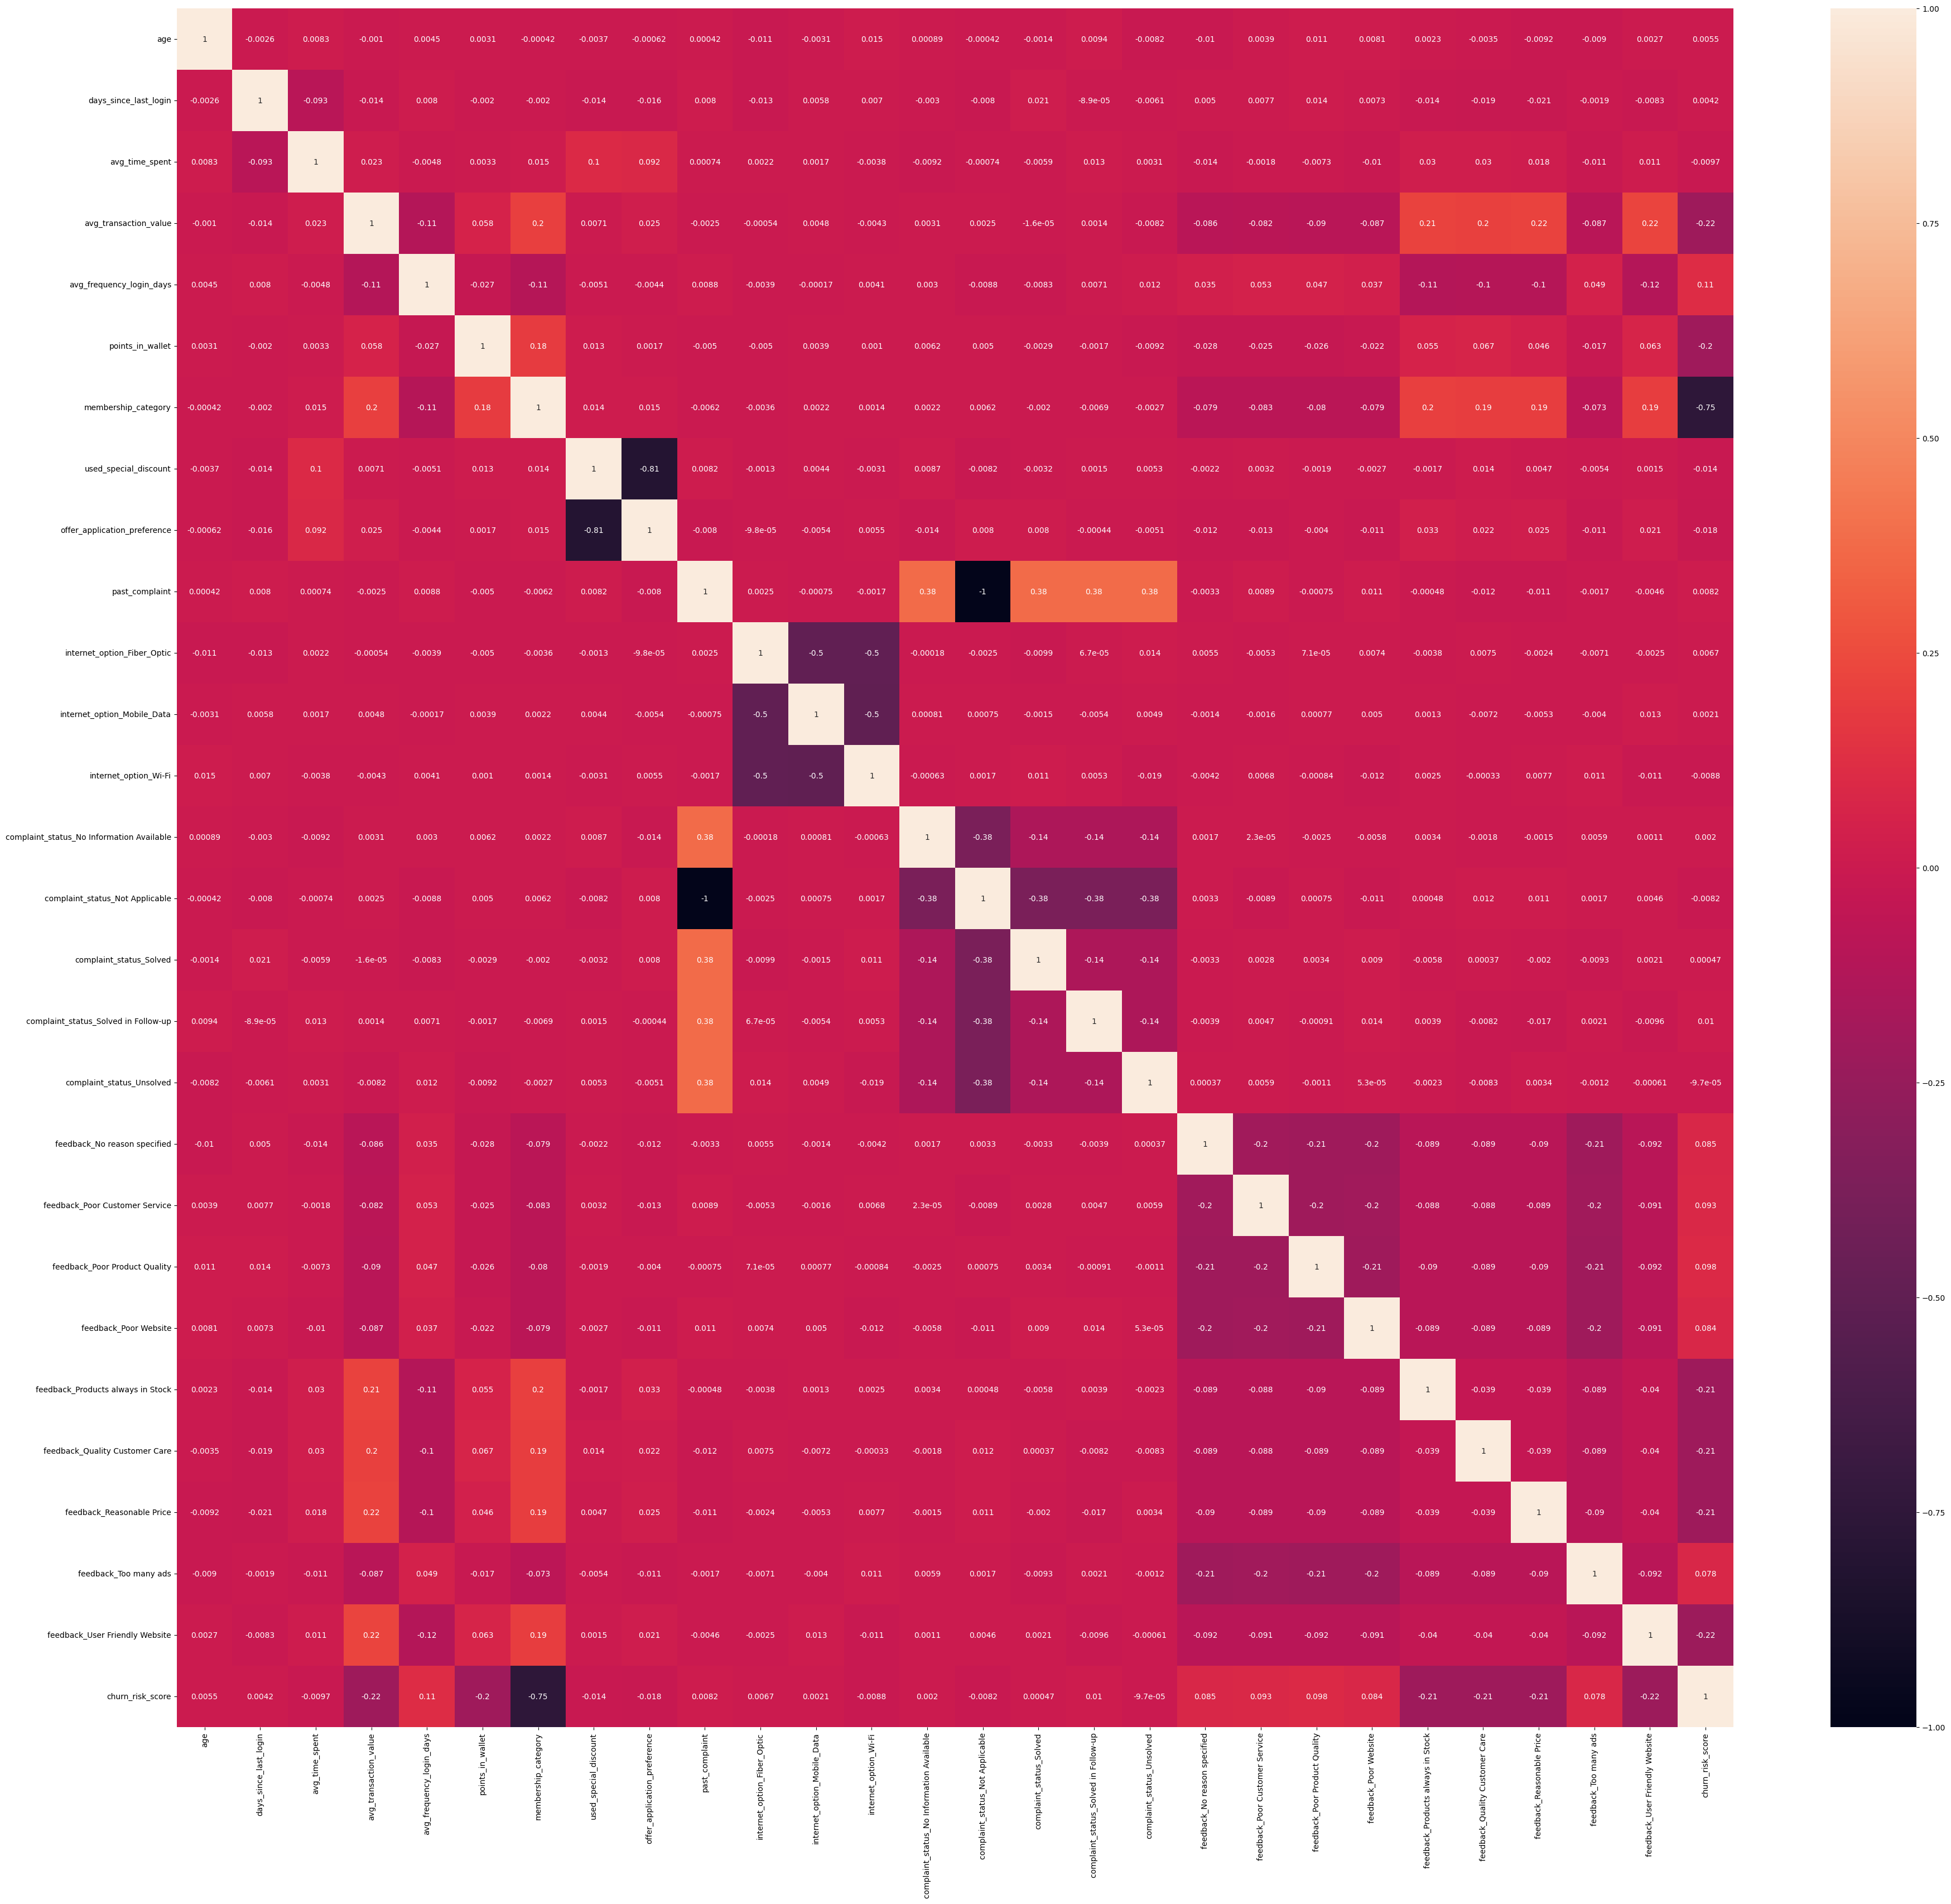

In [520]:
#Correlation
fig,ax = plt.subplots(figsize=[45,40])
corr = X_train_eda_corr.corr()
ax = sns.heatmap(corr,annot=True)
plt.show()

Based on correlation, feature importance will be :`avg_transaction_value`, `avg_frequency_login_days`,`points_in_wallet`,`membership_category`,`feedback`

In [524]:
# Calling original features
X_before_columns = X_train.columns
X_before_columns

Index(['age', 'membership_category', 'internet_option',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

In [569]:
# Feature after feature selection
X_after_columns = ['avg_transaction_value', 'avg_frequency_login_days','points_in_wallet','membership_category','feedback']
X_after_columns

['avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'membership_category',
 'feedback']

In [570]:
# Feature not included for modeling
for item in X_before_columns:
    if item not in X_after_columns:
      print('After feature selection using Recursive feature elimination method:', {item}, 'is not included in modeling')

After feature selection using Recursive feature elimination method: {'age'} is not included in modeling
After feature selection using Recursive feature elimination method: {'internet_option'} is not included in modeling
After feature selection using Recursive feature elimination method: {'days_since_last_login'} is not included in modeling
After feature selection using Recursive feature elimination method: {'avg_time_spent'} is not included in modeling
After feature selection using Recursive feature elimination method: {'used_special_discount'} is not included in modeling
After feature selection using Recursive feature elimination method: {'offer_application_preference'} is not included in modeling
After feature selection using Recursive feature elimination method: {'past_complaint'} is not included in modeling
After feature selection using Recursive feature elimination method: {'complaint_status'} is not included in modeling


In [571]:
# define function for iqr and gaussian cleaned
iqr_columns_1_cleaned = []
iqr_columns_2_cleaned = []
gaussian_columns_cleaned = []
def iqr_or_gaussian_cleaned(columns):
  for col in columns:
    if col in iqr_feature_1:
      iqr_columns_1_cleaned.append(col)
    elif col in iqr_feature_2:
      iqr_columns_2_cleaned.append(col)
    elif col in gaussian_feature:
      gaussian_columns_cleaned.append(col)


In [572]:
# process function
iqr_or_gaussian_cleaned(X_after_columns)

In [573]:
print(iqr_columns_1_cleaned)

['points_in_wallet']


In [574]:
print(gaussian_columns_cleaned)

['avg_frequency_login_days']


In [575]:
print(iqr_columns_2_cleaned)

['avg_transaction_value']


### Pipeline Preprocessing

In [576]:
## Building pipeline iqr= 3
num_pipeline_1 = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3,missing_values='ignore')),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])

num_tr_1 = num_pipeline_1.fit_transform(X_train[['points_in_wallet']])

In [579]:
## Building pipeline iqr= 1.5
num_pipeline_2 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5,missing_values='ignore')),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])

num_tr_2 = num_pipeline_2.fit_transform(X_train[['avg_transaction_value']])

In [580]:
## Building pipeline Gaussian
num_pipeline_3 = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3,missing_values='ignore')),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])

num_tr_3 = num_pipeline_3.fit_transform(X_train[['avg_frequency_login_days']])

In [581]:
## Building pipeline ohe
cat_1_pipeline = Pipeline([
        ('imputer_2', SimpleImputer(strategy='most_frequent')),
        ('ohe_enc', OneHotEncoder(sparse=False))
    ])

cat_1_tr = cat_1_pipeline.fit_transform(X_train[['membership_category','feedback']])

In [582]:
# Bulding full-pipeline
full_pipeline = ColumnTransformer([
        ("num_1", num_pipeline_1, ['points_in_wallet']),
        ("num_2", num_pipeline_2, ['avg_transaction_value']),
        ("num_3", num_pipeline_3, ['avg_frequency_login_days']),
        ("categorical_1", cat_1_pipeline, ['membership_category','feedback'])
        ])

train_tr = full_pipeline.fit_transform(X_train)

In [583]:
train_tr

array([[-0.27731404,  0.44526636, -0.93333333, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.54293926,  0.40427085,  0.93333333, ...,  0.        ,
         0.        ,  0.        ],
       [-0.24420028, -0.32815793,  0.13333333, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.54640465,  0.01822714,  0.26666667, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50784527, -0.71739362,  0.66666667, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.42676604,  0.65652548,  0.33333333, ...,  0.        ,
         0.        ,  0.        ]])

In [584]:
# Implementing pipeline to X_val
val_tr= full_pipeline.transform(X_val)

In [585]:
val_tr

array([[ 0.18556361,  2.00048412, -0.66666667, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.34684195, -0.12454651,  0.13333333, ...,  0.        ,
         0.        ,  0.        ],
       [-3.73990291,  0.68608805,  0.86666667, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.4676907 ,  0.39585627,  0.46666667, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27896423, -0.56803313, -0.4       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.05074327,  0.43400855, -0.13333333, ...,  0.        ,
         0.        ,  0.        ]])

In [586]:
# ETL for train model and validation
training_batches = tf.data.Dataset.from_tensor_slices((train_tr, y_train)).shuffle(train_tr.shape[0]).batch(32)
validation_batches = tf.data.Dataset.from_tensor_slices((val_tr, y_val)).shuffle(val_tr.shape[0]).batch(32)

AUTOTUNE = tf.data.AUTOTUNE
training_batches = training_batches.cache().prefetch(buffer_size= AUTOTUNE)
validation_batches = validation_batches.cache().prefetch(buffer_size= AUTOTUNE)

# Model Definition

**Artificial Neural Network (ANN):**

An Artificial Neural Network (ANN) is a type of machine learning model inspired by the human brain's biological neural networks. It consists of interconnected nodes, known as neurons, organized in layers. The key components of an ANN are:

- Input Layer: The first layer of the network that receives the input data. Each neuron in this layer corresponds to a feature in the input data.

- Hidden Layers: One or more layers between the input and output layers. These layers process the input data using weights and activation functions to learn complex patterns and representations.

- Output Layer: The final layer of the network that produces the model's predictions or outputs.

- Weights and Biases: Parameters that are learned during the training process to adjust the strength of connections between neurons.

- Activation Functions: Non-linear functions applied to the output of neurons in each layer, introducing non-linearity to the model and enabling it to learn complex relationships in the data.

ANNs are used for various tasks, including classification, regression, and even unsupervised learning tasks like clustering.

1. Sequential API:
The Sequential API is a simple and straightforward way to build and train neural networks in TensorFlow. It allows you to create a sequential stack of layers, where the output of each layer is passed as input to the next layer. The Sequential API is best suited for single-input, single-output models.

2. Functional API:
The Functional API in TensorFlow provides more flexibility and allows you to create complex models with multiple inputs and outputs, shared layers, and branching architectures. It is suitable for building multi-input, multi-output, and models with more intricate architectures.

# Model Training

## ANN Sequential

In [765]:
# Ann Sequential Architecture
inp = train_tr.shape[1]
out = 1


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,)),
    tf.keras.layers.Dense(120, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_188 (Dense)           (None, 18)                342       
                                                                 
 dense_189 (Dense)           (None, 120)               2280      
                                                                 
 dense_190 (Dense)           (None, 1)                 121       
                                                                 
Total params: 2,743
Trainable params: 2,743
Non-trainable params: 0
_________________________________________________________________


In [766]:
# Ann Sequential Model Compile
model.compile(optimizer='RMSprop',
            loss='mean_absolute_error',
            metrics=['accuracy']
            )

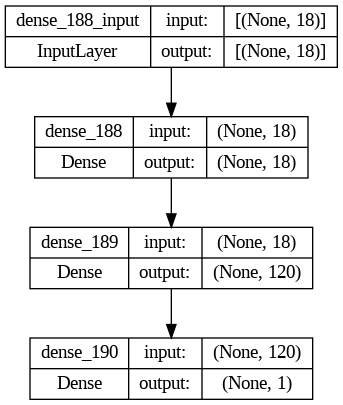

In [767]:
# Architecture Model
tf.keras.utils.plot_model(model, show_shapes=True)

In [768]:
# Callback function for fit the best epoch
callbacks1= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
]

In [769]:
#training model ANN Sequential
history_ann_seq= model.fit(training_batches,
                         validation_data= validation_batches,
                         callbacks=callbacks1,
                         epochs= 60,
                         )

Epoch 1/60
740/740 [==============================] - 3s 2ms/step - loss: 0.1633 - accuracy: 0.8661 - val_loss: 0.1000 - val_accuracy: 0.9182
Epoch 2/60
740/740 [==============================] - 2s 2ms/step - loss: 0.0864 - accuracy: 0.9219 - val_loss: 0.0822 - val_accuracy: 0.9235
Epoch 3/60
740/740 [==============================] - 2s 2ms/step - loss: 0.0790 - accuracy: 0.9246 - val_loss: 0.0788 - val_accuracy: 0.9263
Epoch 4/60
740/740 [==============================] - 2s 2ms/step - loss: 0.0769 - accuracy: 0.9258 - val_loss: 0.0773 - val_accuracy: 0.9262
Epoch 5/60
740/740 [==============================] - 2s 2ms/step - loss: 0.0759 - accuracy: 0.9256 - val_loss: 0.0765 - val_accuracy: 0.9257
Epoch 6/60
740/740 [==============================] - 2s 3ms/step - loss: 0.0754 - accuracy: 0.9259 - val_loss: 0.0760 - val_accuracy: 0.9250
Epoch 7/60
740/740 [==============================] - 2s 3ms/step - loss: 0.0750 - accuracy: 0.9260 - val_loss: 0.0758 - val_accuracy: 0.9250
Epoch 

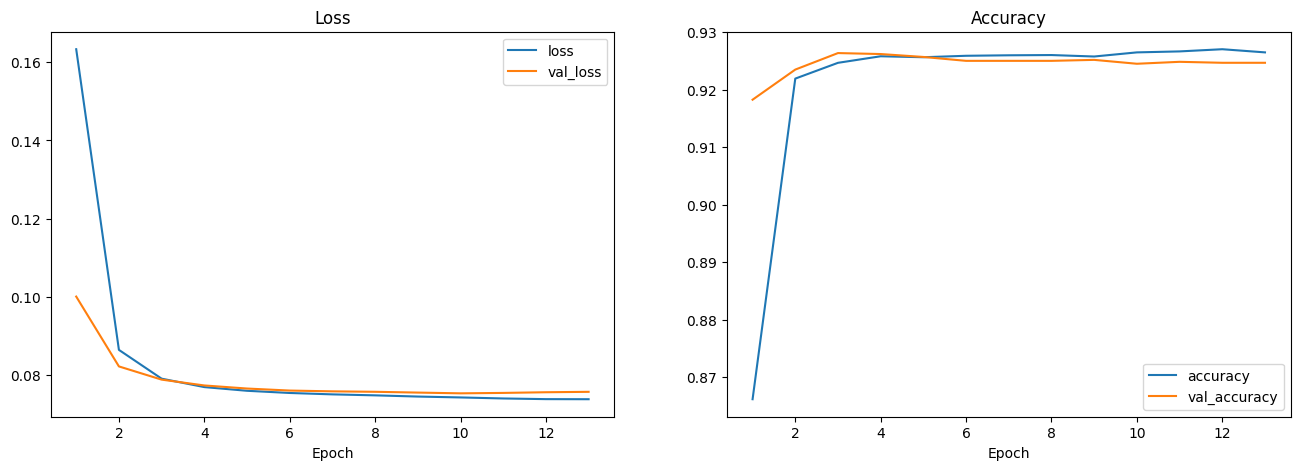

In [770]:
# Visualize Result
epoch=13
fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_ann_seq.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_ann_seq.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history_ann_seq.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_ann_seq.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

In [771]:
#ANN Sq MAE
y_test_pred_ann = model.predict(val_tr)
print('MAE:',mean_absolute_error(y_val,y_test_pred_ann))

185/185 [==============================] - 0s 2ms/step
MAE: 0.07526132095999843


In [772]:
# ANN Sq Accuracy
test_results= model.evaluate(val_tr,y_val, verbose=1)
print(f'Test loss (MAE):, {test_results}')
print(f'Test Accuracy: {test_results[1]}')

185/185 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9245
Test loss (MAE):, [0.07526132464408875, 0.9244804978370667]
Test Accuracy: 0.9244804978370667


## Functional

In [656]:
#ANN Functional
input_lyr = tf.keras.layers.Input(shape=(train_tr.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
layers = tf.keras.layers.Dense(hid, kernel_initializer='HeNormal',activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output = tf.keras.layers.Dense(out, kernel_initializer='HeNormal',activation='sigmoid')(layers)

model_funct = tf.keras.models.Model(inputs=input_lyr,outputs=output)

In [657]:
model_funct.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_136 (Dense)           (None, 18)                342       
                                                                 
 batch_normalization_14 (Bat  (None, 18)               72        
 chNormalization)                                                
                                                                 
 dropout_28 (Dropout)        (None, 18)                0         
                                                                 
 dense_137 (Dense)           (None, 124)               2356      
                                                                 
 batch_normalization_15 (Bat  (None, 124)              496       
 chNormalization)                                          

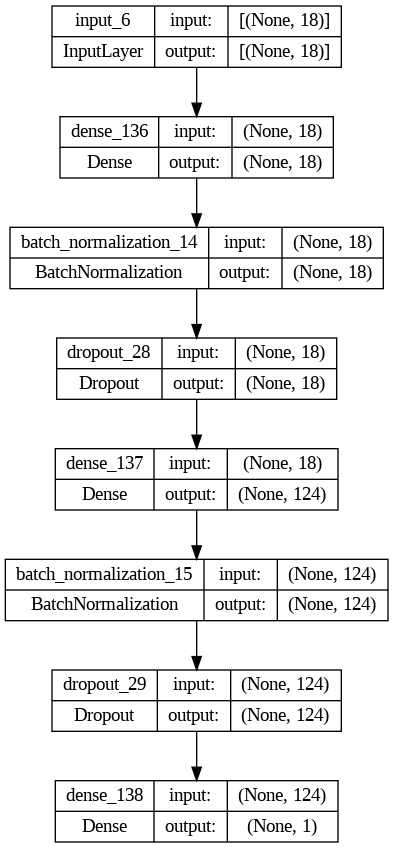

In [658]:
# Architecture Model Fnc API
tf.keras.utils.plot_model(model_funct, show_shapes=True)

In [659]:
# Model Compile
model_funct.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(clipvalue=0.5,learning_rate=0.01),metrics='accuracy')

In [660]:
# Model Training
history_ann_funct = model_funct.fit(train_tr, y_train, epochs=60, callbacks=callbacks1,batch_size=32, validation_data=(val_tr,y_val))

Epoch 1/60
740/740 [==============================] - 4s 3ms/step - loss: 0.3246 - accuracy: 0.8879 - val_loss: 0.2427 - val_accuracy: 0.9176
Epoch 2/60
740/740 [==============================] - 2s 3ms/step - loss: 0.2549 - accuracy: 0.9092 - val_loss: 0.2276 - val_accuracy: 0.9157
Epoch 3/60
740/740 [==============================] - 2s 3ms/step - loss: 0.2519 - accuracy: 0.9135 - val_loss: 0.2308 - val_accuracy: 0.9211
Epoch 4/60
740/740 [==============================] - 3s 4ms/step - loss: 0.2513 - accuracy: 0.9121 - val_loss: 0.2351 - val_accuracy: 0.9143
Epoch 5/60
740/740 [==============================] - 3s 4ms/step - loss: 0.2430 - accuracy: 0.9153 - val_loss: 0.2422 - val_accuracy: 0.9192


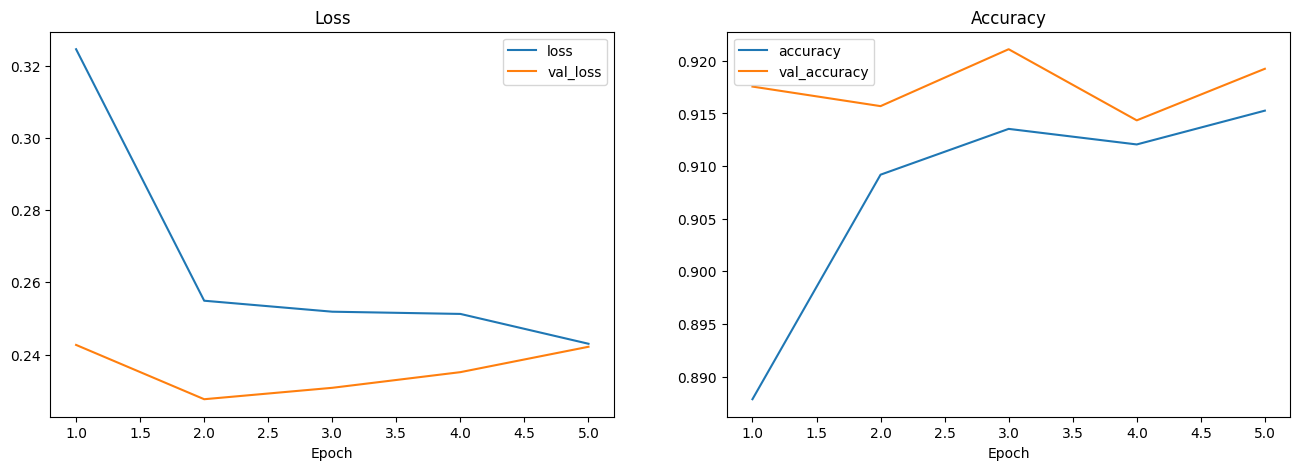

In [693]:
# Visualsize Results
epoch=5

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_ann_funct.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_ann_funct.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history_ann_funct.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_ann_funct.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

In [694]:
#ANN FNC MAE
y_test_pred_funct = model_funct.predict(val_tr)
print('MAE:',mean_absolute_error(y_val,y_test_pred_funct))

185/185 [==============================] - 0s 1ms/step
MAE: 0.11884980289372891


In [695]:
# ANN FNC Accuracy
Test_results_funct = model_funct.evaluate(val_tr,y_val, verbose=1)
print(f'Test loss (MAE):, {test_results_funct}')
print(f'Test Accuracy: {test_results_funct[1]}')

185/185 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.9157
Test loss (MAE):, [0.22761628031730652, 0.9156951904296875]
Test Accuracy: 0.9156951904296875


# Model Improvement

In [607]:
#Imbalance Data
X_new = df_clean.drop(['user_id','joining_date', 'last_visit_time', 'churn_risk_score'], axis=1)
y_new = df_clean.churn_risk_score

y_new.value_counts()

1    20012
0    16980
Name: churn_risk_score, dtype: int64

In [608]:
X_new.head(5)

,age,membership_category,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,29,No Membership,Wi-Fi,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website
1,50,Basic Membership,Fiber_Optic,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service
2,26,Silver Membership,Fiber_Optic,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads
3,63,No Membership,Fiber_Optic,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads
4,64,Silver Membership,Wi-Fi,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality


In [609]:
# SMOTE-NC

from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC([1, 2, 8, 9, 10, 11, 12],random_state = 42)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_new, y_new)
y_train_balanced.value_counts()


1    20012
0    20012
Name: churn_risk_score, dtype: int64

In [614]:
X_new = X_train_balanced

In [615]:
y_new = y_train_balanced

In [618]:
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_new,y_new, train_size=0.8, stratify=y_new, random_state=0)

In [619]:
train_tr_new = full_pipeline.fit_transform(X_train_new)

In [620]:
train_tr_new

array([[ 0.26135161, -0.08604589,  0.21584004, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05459914, -0.22233279, -0.43168008, ...,  0.        ,
         1.        ,  0.        ],
       [-3.24995359,  0.10546857, -0.57557344, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.4154549 ,  0.02293775, -0.57557344, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10022842, -0.04728795,  0.79141348, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.93283108,  0.16701218,  0.79141348, ...,  0.        ,
         0.        ,  0.        ]])

In [621]:
val_tr_new = full_pipeline.transform(X_val_new)

In [622]:
val_tr_new

array([[-0.84740097, -0.60827106,  0.28778672, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12951901, -0.57797547, -0.36405714, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.02981862,  0.6884534 ,  0.50362676, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-3.84645384,  0.77312495,  0.79141348, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13309934, -0.02496861,  0.07194668, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.56633063,  0.7041062 ,  0.28778672, ...,  0.        ,
         0.        ,  0.        ]])

In [623]:
# new ETL for train model and validation
training_batches_new = tf.data.Dataset.from_tensor_slices((train_tr_new, y_train_new)).shuffle(train_tr_new.shape[0]).batch(32)
validation_batches_new = tf.data.Dataset.from_tensor_slices((val_tr_new, y_val_new)).shuffle(val_tr_new.shape[0]).batch(32)

AUTOTUNE = tf.data.AUTOTUNE
training_batches_new = training_batches.cache().prefetch(buffer_size= AUTOTUNE)
validation_batches_new = validation_batches.cache().prefetch(buffer_size= AUTOTUNE)

## Sequential Improvement

In this Improvement will use more hidden layer, and optimizer params

In [752]:
# ANN Sq Improvement
inp = train_tr.shape[1]
out = 1
hidden_units1 = 100
hidden_units2 = 100
model_new = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,)),
    tf.keras.layers.Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

#Fungsi aktivasi untuk output layer
#Regresi -> Relu/Linear
#Klasifikasi -> Sigmoid (Binary), Softmax (Multiclass)

model_new.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 18)                342       
                                                                 
 dense_185 (Dense)           (None, 100)               1900      
                                                                 
 dense_186 (Dense)           (None, 100)               10100     
                                                                 
 dense_187 (Dense)           (None, 1)                 101       
                                                                 
Total params: 12,443
Trainable params: 12,443
Non-trainable params: 0
_________________________________________________________________


In [759]:
# Model compile
model_new.compile(optimizer='Adam',
            loss='mean_absolute_error',
            metrics=['accuracy']
            )

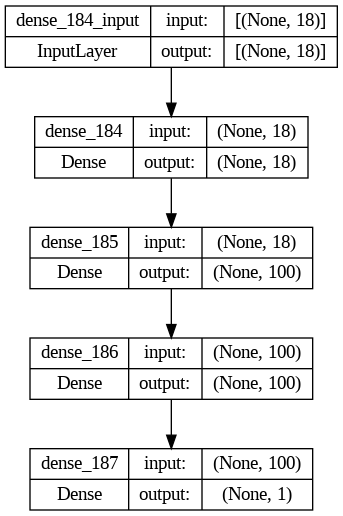

In [760]:
tf.keras.utils.plot_model(model_new, show_shapes=True)

In [761]:
#training model
history_ann_seq_new= model_new.fit(training_batches_new,
                         validation_data= validation_batches_new,
                         callbacks=callbacks1,
                         epochs= 100
                         )

Epoch 1/100
740/740 [==============================] - 22s 3ms/step - loss: 0.0727 - accuracy: 0.9292 - val_loss: 0.0687 - val_accuracy: 0.9312
Epoch 2/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0715 - accuracy: 0.9289 - val_loss: 0.0694 - val_accuracy: 0.9304
Epoch 3/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0718 - accuracy: 0.9287 - val_loss: 0.0690 - val_accuracy: 0.9316
Epoch 4/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0714 - accuracy: 0.9290 - val_loss: 0.0684 - val_accuracy: 0.9319
Epoch 5/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0711 - accuracy: 0.9293 - val_loss: 0.0676 - val_accuracy: 0.9331
Epoch 6/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0710 - accuracy: 0.9297 - val_loss: 0.0675 - val_accuracy: 0.9333
Epoch 7/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0701 - accuracy: 0.9303 - val_loss: 0.0673 - val_accuracy: 0.932

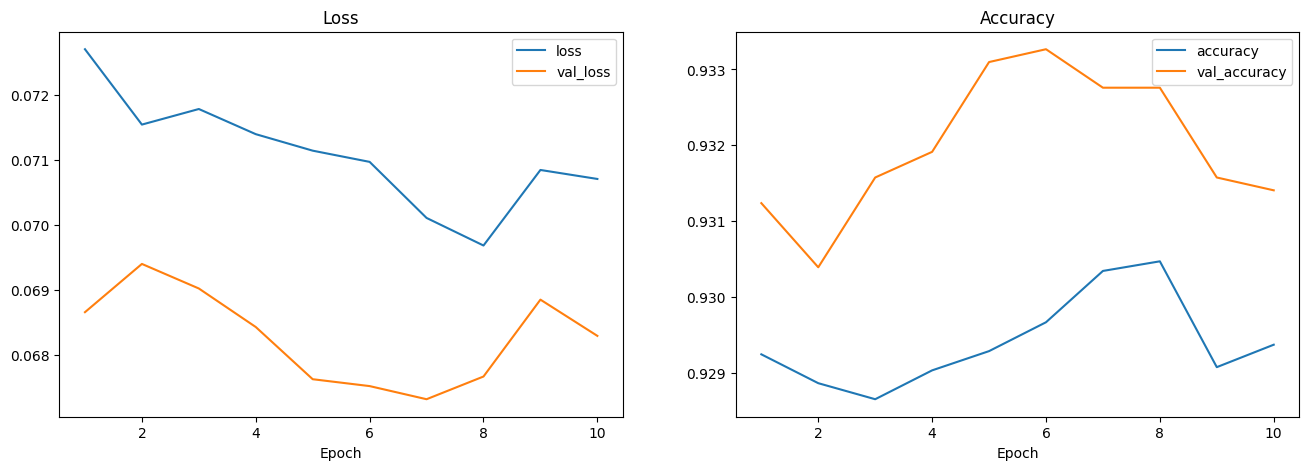

In [762]:
# Model Visualization
epoch=10
fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_ann_seq_new.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_ann_seq_new.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history_ann_seq_new.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_ann_seq_new.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

In [763]:
#ANN Sq Improvement MAE
y_test_pred_ann_new = model_new.predict(val_tr_new)
print('MAE:',mean_absolute_error(y_val_new,y_test_pred_ann_new))

251/251 [==============================] - 0s 1ms/step
MAE: 0.07446139043973102


In [764]:
#ANN Sq Improvement Accuracy
test_results_new= model_new.evaluate(val_tr_new,y_val_new, verbose=1)
print(f'Test loss (MAE):, {test_results_new}')
print(f'Test Accuracy: {test_results_new[1]}')

251/251 [==============================] - 1s 2ms/step - loss: 0.0745 - accuracy: 0.9262
Test loss (MAE):, [0.07446139305830002, 0.9261711239814758]
Test Accuracy: 0.9261711239814758


## Functional Improvement

For Imporve using more Hidden Layer and Optimezer Params

In [698]:
#Functional Imporvement
input_lyr_new = tf.keras.layers.Input(shape=(train_tr_new.shape[1],))
layers_new = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_lyr)
layers_new = tf.keras.layers.BatchNormalization()(layers)
layers_new = tf.keras.layers.Dense(hid, kernel_initializer='HeNormal',activation='relu')(layers)
layers_new = tf.keras.layers.BatchNormalization()(layers)
layers_new = tf.keras.layers.Dense(hid, kernel_initializer='HeNormal',activation='relu')(layers)
layers_new = tf.keras.layers.BatchNormalization()(layers)
layers_new = tf.keras.layers.Dense(hid, kernel_initializer='HeNormal',activation='relu')(layers)
layers_new = tf.keras.layers.BatchNormalization()(layers)
layers_new = tf.keras.layers.Dropout(0.1)(layers)
output_new = tf.keras.layers.Dense(out, kernel_initializer='HeNormal',activation='sigmoid')(layers)

model_funct_new = tf.keras.models.Model(inputs=input_lyr,outputs=output)

In [699]:
model_funct_new.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_136 (Dense)           (None, 18)                342       
                                                                 
 batch_normalization_14 (Bat  (None, 18)               72        
 chNormalization)                                                
                                                                 
 dropout_28 (Dropout)        (None, 18)                0         
                                                                 
 dense_137 (Dense)           (None, 124)               2356      
                                                                 
 batch_normalization_15 (Bat  (None, 124)              496       
 chNormalization)                                          

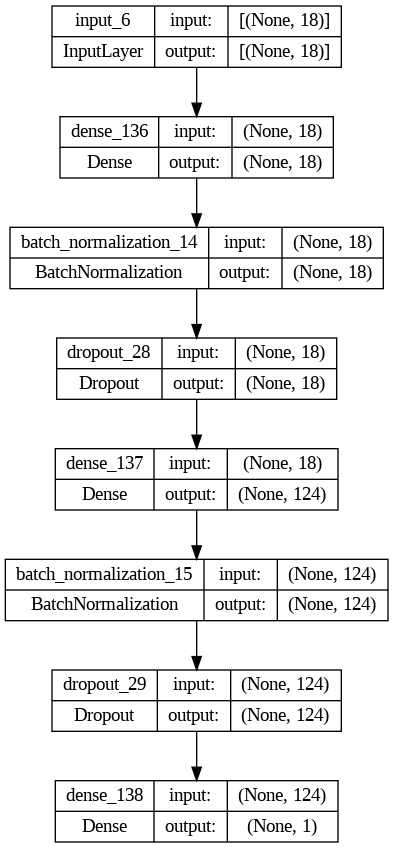

In [700]:
tf.keras.utils.plot_model(model_funct_new, show_shapes=True)

In [701]:
# Model Compile
model_funct_new.compile(loss='binary_crossentropy',optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    epsilon=1e-07,
    name="RMSprop"
),metrics='accuracy')

In [702]:
# Model Train
history_ann_funct_new = model_funct_new.fit(train_tr_new, y_train_new, epochs=60,callbacks = callbacks1, batch_size=32, validation_data=(val_tr_new,y_val_new))

Epoch 1/60
1001/1001 [==============================] - 5s 4ms/step - loss: 0.2093 - accuracy: 0.9245 - val_loss: 0.1820 - val_accuracy: 0.9297
Epoch 2/60
1001/1001 [==============================] - 4s 4ms/step - loss: 0.1929 - accuracy: 0.9252 - val_loss: 0.1742 - val_accuracy: 0.9319
Epoch 3/60
1001/1001 [==============================] - 4s 4ms/step - loss: 0.1875 - accuracy: 0.9265 - val_loss: 0.1766 - val_accuracy: 0.9273
Epoch 4/60
1001/1001 [==============================] - 3s 3ms/step - loss: 0.1878 - accuracy: 0.9262 - val_loss: 0.1738 - val_accuracy: 0.9309
Epoch 5/60
1001/1001 [==============================] - 4s 4ms/step - loss: 0.1877 - accuracy: 0.9252 - val_loss: 0.1732 - val_accuracy: 0.9294
Epoch 6/60
1001/1001 [==============================] - 4s 4ms/step - loss: 0.1859 - accuracy: 0.9251 - val_loss: 0.1788 - val_accuracy: 0.9258
Epoch 7/60
1001/1001 [==============================] - 3s 3ms/step - loss: 0.1858 - accuracy: 0.9284 - val_loss: 0.1749 - val_accuracy:

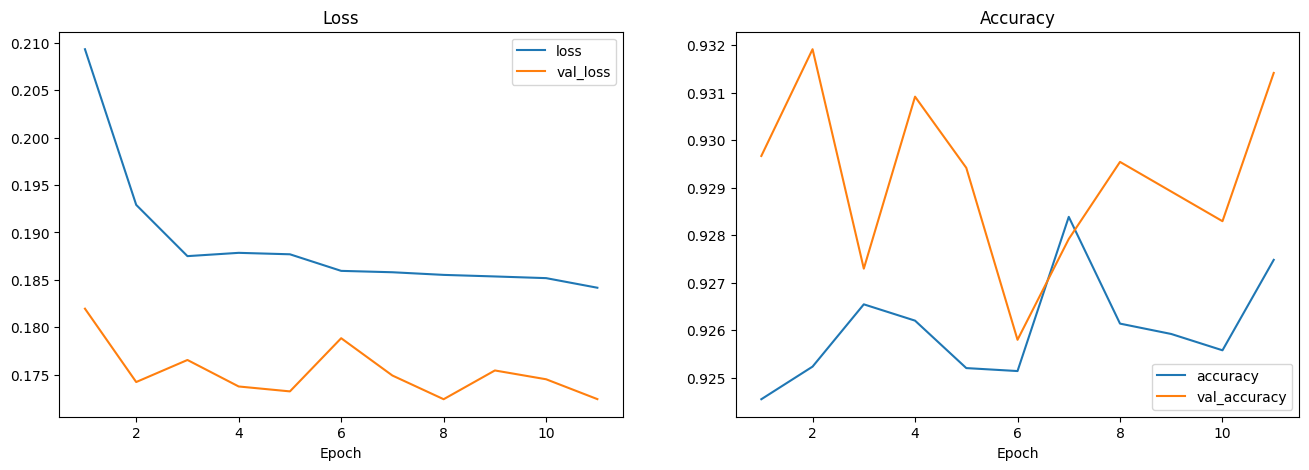

In [703]:
# Model Train Visualization
epoch=11
fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_ann_funct_new.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_ann_funct_new.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')


ax[1].plot(range(1,epoch+1),history_ann_funct_new.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_ann_funct_new.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')


plt.show()

In [704]:
#ANN FNC Improvement MAE
y_test_pred_funct_new = model_funct_new.predict(val_tr_new)
print('MAE:',mean_absolute_error(y_val_new,y_test_pred_funct_new))

251/251 [==============================] - 0s 1ms/step
MAE: 0.10155284820499946


In [705]:
#ANN FNC Improvement Accuracy
test_results_funct_new = model_funct_new.evaluate(val_tr_new,y_val_new, verbose=1)
print(f'Test loss (MAE):, {test_results_funct_new}')
print(f'Test Accuracy: {test_results_funct_new[1]}')

251/251 [==============================] - 0s 2ms/step - loss: 0.1724 - accuracy: 0.9295
Test loss (MAE):, [0.17241445183753967, 0.9295440316200256]
Test Accuracy: 0.9295440316200256


# Model Evaluation

In [776]:
# Test results
results = {
    'Test': ['Sq', 'Fnc', 'Sq Improve', 'Fnc Improve'],
    'Test loss (MAE)': [0.07526132095999843, 0.11884980289372891, 0.07446139043973102, 0.10155284820499946],
    'Test Accuracy': [0.9244804978370667, 0.9156951904296875, 0.9261711239814758, 0.9295440316200256]
}

# Create the DataFrame
result_model = pd.DataFrame(results)

# Display the DataFrame
result_model

,Test,Test loss (MAE),Test Accuracy
0,Sq,0.075261,0.924480
1,Fnc,0.118850,0.915695
2,Sq Improve,0.074461,0.926171
3,Fnc Improve,0.101553,0.929544


1. Sequential API (Sq):

- Test Loss (MAE): 0.075261
- Test Accuracy: 0.924480
This is the initial ANN model created using the Sequential API. The model achieved a test loss of approximately 0.075 and a test accuracy of approximately 92.45%.

2. Functional API (Fnc):

- Test Loss (MAE): 0.118850
- Test Accuracy: 0.915695
This is the initial ANN model created using the Functional API. The model achieved a test loss of approximately 0.119 and a test accuracy of approximately 91.57%.

3. Sequential API Improved (Sq Improve):

- Test Loss (MAE): 0.074461
- Test Accuracy: 0.926171
This is an improved version of the ANN model created using the Sequential API. The improvements resulted in a slightly lower test loss of approximately 0.074 and a slightly higher test accuracy of approximately 92.62% compared to the original Sq model.

4. Functional API Improved (Fnc Improve):

- Test Loss (MAE): 0.101553
- Test Accuracy: 0.929544
This is an improved version of the ANN model created using the Functional API. The improvements resulted in a lower test loss of approximately 0.102 and a higher test accuracy of approximately 92.95% compared to the original Fnc model.

In summary, both the Sequential API and Functional API models achieved reasonably good test accuracy on the given dataset. The improved versions of both models (Sq Improve and Fnc Improve) show better performance with lower test loss and higher test accuracy than their respective initial versions. The improvements indicate that adjustments or changes made to the models resulted in better generalization and predictions on unseen data.

# Model Saving

In [777]:
#model dan preprocessing
with open('full_pipeline.pkl', 'wb') as file_1:
  joblib.dump(full_pipeline, file_1)


# Model Inference

In [778]:
with open('full_pipeline.pkl', 'rb') as file_1:
  full_pipeline= joblib.load(file_1)
with open('full_pipeline.pkl', 'rb') as file_1:
  full_pipeline= joblib.load(file_1)

In [779]:
X_test

,age,membership_category,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
19056,37,No Membership,Mobile_Data,13,73.25,43856.32,17.0,591.42,Yes,No,Yes,Solved in Follow-up,Poor Website
25832,32,Platinum Membership,Wi-Fi,12,97.04,10954.33,24.0,712.75,Yes,No,Yes,Solved,Poor Website
29127,26,Basic Membership,Fiber_Optic,10,488.06,7167.97,10.0,650.54,No,Yes,No,Not Applicable,Too many ads
11595,62,No Membership,Wi-Fi,14,33.04,46595.79,0.0,652.46,No,Yes,No,Not Applicable,Poor Product Quality
3487,60,Silver Membership,Wi-Fi,10,136.56,2613.83,8.0,712.31,Yes,No,Yes,Solved in Follow-up,Poor Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25259,17,Gold Membership,Fiber_Optic,1,408.23,32083.73,0.0,775.13,Yes,No,Yes,Unsolved,Poor Product Quality
31419,37,Basic Membership,Mobile_Data,12,38.21,44655.98,24.0,0.00,Yes,No,No,Not Applicable,Poor Product Quality
856,38,No Membership,Wi-Fi,20,50.96,30385.72,22.0,603.34,Yes,No,No,Not Applicable,Poor Product Quality
13377,61,Gold Membership,Mobile_Data,21,356.47,4476.18,5.0,700.68,No,Yes,Yes,Solved in Follow-up,No reason specified


In [780]:
Inference = full_pipeline.fit_transform(X_test)

In [781]:
Inference

array([[-0.47562205,  0.59730042,  0.14285714, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16807258, -0.64277449,  0.64285714, ...,  0.        ,
         0.        ,  0.        ],
       [-0.16197146, -0.78548228, -0.35714286, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.41238262,  0.08959395,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10403735, -0.88693575, -0.71428571, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.34505809, -0.78981097, -1.07142857, ...,  0.        ,
         0.        ,  0.        ]])

In [782]:
model_tf = tf.keras.models.load_model("model_best.hdf5")

In [783]:
result_inference = model_tf.predict(Inference)

232/232 [==============================] - 0s 1ms/step


In [784]:
result_inference

array([[1.0000000e+00],
       [2.7658955e-15],
       [1.0000000e+00],
       ...,
       [1.0000000e+00],
       [1.4513126e-01],
       [2.9061751e-14]], dtype=float32)

In [785]:
class_predictions = tf.round(result_inference)

In [786]:
class_predictions_list = class_predictions.numpy().flatten().tolist()

In [787]:
inference_test = pd.DataFrame({
    'actual':y_test,
    'pred':class_predictions_list
})

In [790]:
result_test = []
for index,values in inference_test.iterrows():
  if values['actual'] == values['pred']:
    result_test.append('Match/predicted')
  else:
    result_test.append('Unmatch/predicted_failed')
inference_test['result_test'] = result_test
inference_test

,actual,pred,result_test
19056,1,1.0,Match/predicted
25832,0,0.0,Match/predicted
29127,1,1.0,Match/predicted
11595,1,1.0,Match/predicted
3487,0,0.0,Match/predicted
...,...,...,...
25259,0,0.0,Match/predicted
31419,1,1.0,Match/predicted
856,1,1.0,Match/predicted
13377,0,0.0,Match/predicted


In [792]:
inference_test[inference_test['result_test']== '%Unmatch%']

,actual,pred,result_test


# Conclusion

### EDA Conslusion

- The dataset has an imbalance in the independent variable "churn_risk_score," which is the target variable indicating the churn risk of customers. It contains two unique values: 0 and 1. Upon examining the dataset, we observe that there are 20,018 instances of class 1 (indicating churn) and 16,992 instances of class 0 (indicating not churn).

- majority user are lived in city and town

- data reveals that the highest churn rate is observed among customers who have either 'No Membership' or a 'Basic Membership.'

- accross costumer activity and loyalty : `avg_transaction_value`, `avg_frequency_login_days` and `points_in_wallet`  indicate more on costumer who likely to churn

- most of churn costumer didn't leave a complaint

### Model Training
1. Sequential API (Sq):

- Test Loss (MAE): 0.075261
- Test Accuracy: 0.924480
This is the initial ANN model created using the Sequential API. The model achieved a test loss of approximately 0.075 and a test accuracy of approximately 92.45%.

2. Functional API (Fnc):

- Test Loss (MAE): 0.118850
- Test Accuracy: 0.915695
This is the initial ANN model created using the Functional API. The model achieved a test loss of approximately 0.119 and a test accuracy of approximately 91.57%.

3. Sequential API Improved (Sq Improve):

- Test Loss (MAE): 0.074461
- Test Accuracy: 0.926171
This is an improved version of the ANN model created using the Sequential API. The improvements resulted in a slightly lower test loss of approximately 0.074 and a slightly higher test accuracy of approximately 92.62% compared to the original Sq model.

4. Functional API Improved (Fnc Improve):

- Test Loss (MAE): 0.101553
- Test Accuracy: 0.929544
This is an improved version of the ANN model created using the Functional API. The improvements resulted in a lower test loss of approximately 0.102 and a higher test accuracy of approximately 92.95% compared to the original Fnc model.

In summary, both the Sequential API and Functional API models achieved reasonably good test accuracy on the given dataset. The improved versions of both models (Sq Improve and Fnc Improve) show better performance with lower test loss and higher test accuracy than their respective initial versions. The improvements indicate that adjustments or changes made to the models resulted in better generalization and predictions on unseen data.

### Model Improvement
For Imporve using more Hidden Layer and Optimezer Params, and handling imbalance data

### Model Inference

as the result all X_test is fully match predictid compare to y_test actual value